In [1]:
from diffusers.image_processor import VaeImageProcessor
from diffusers import AutoencoderKL
import torch

# batch*channel*h*w  tensor数据
def denormalize(normalized_data):
    prefix = "/public/home/yangzhe/ltt/lsj/git_workspace/OOTDiffusion-old"
    VAE_PATH = prefix+"/checkpoints/ootd"

    vae = AutoencoderKL.from_pretrained(
        VAE_PATH,
        subfolder="vae",
        torch_dtype=torch.float16,
    )

    vae_scale_factor = 2 ** (len(vae.config.block_out_channels) - 1)

    image_processor = VaeImageProcessor(vae_scale_factor=vae_scale_factor)
    ### 上面 image_processor 解决了 ###
    ### output_type ? do_denormalize ?
    output_type: str = "pil"
    # do_denormalize ?
    batch = normalized_data.shape[0]
    do_denormalize=[True]*(batch)

    image = image_processor.postprocess(
            normalized_data.float(),
            output_type=output_type, 
            do_denormalize=do_denormalize)
    return image

/public/home/yangzhe/miniconda3/envs/ootd/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [1]:
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import os

In [148]:
prefix = '/public/home/yangzhe/ltt/lsj/OOTD_attn_qkv/'
all_file=os.listdir(prefix)
all_file=sorted(all_file)
# 336 = 16*21 
print(len(all_file))
# 0~99 768*2=1536
# 100~119 192*2=368
low,high = 0,99
# low,high=100,119
size=768
# size=192

120


In [147]:
self_attn_20=all_file[:]
print(self_attn_20[99])

self-1536-1716621820550.pth


In [142]:
def load(fname):
    return torch.load(f'{prefix}{fname}',map_location=torch.device('cpu'))

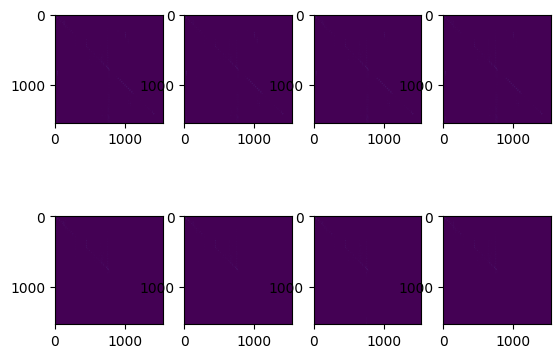

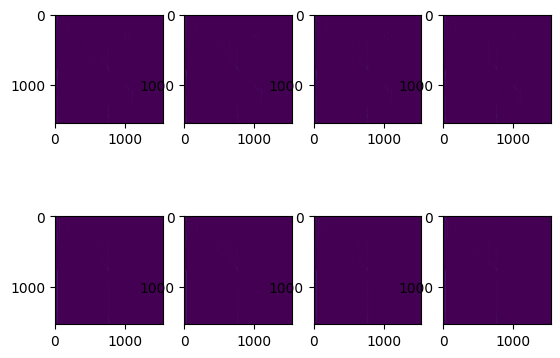

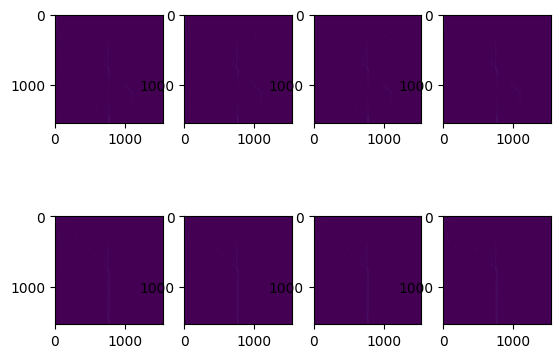

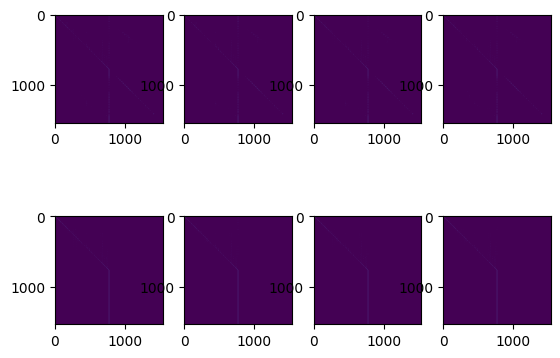

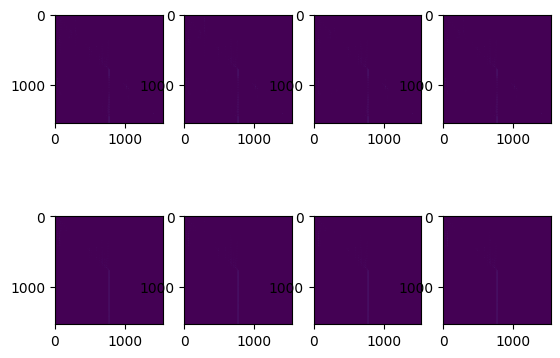

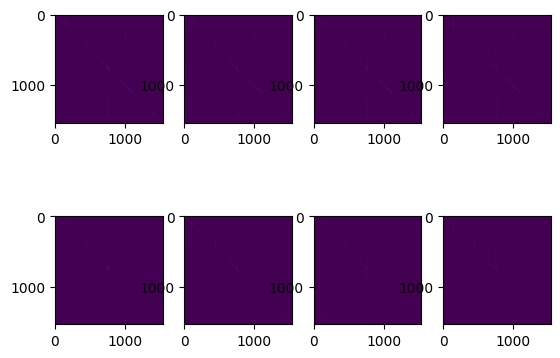

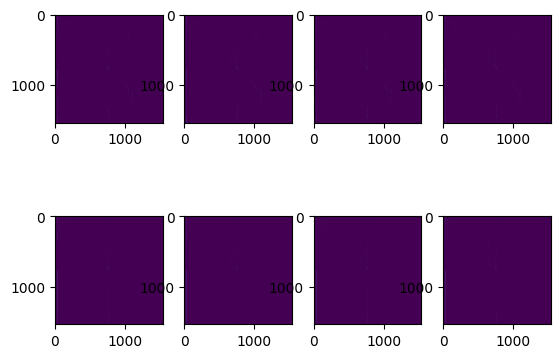

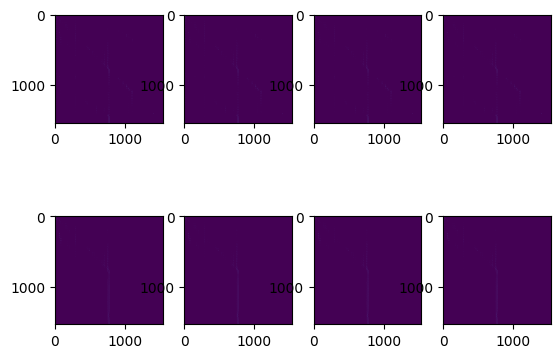

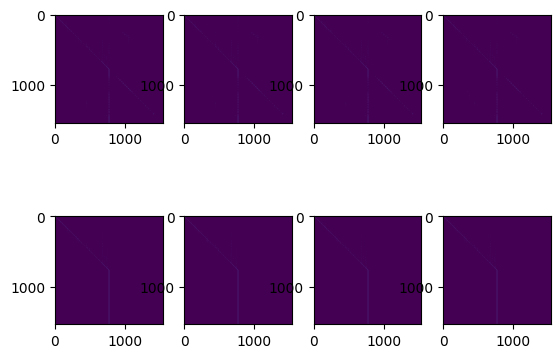

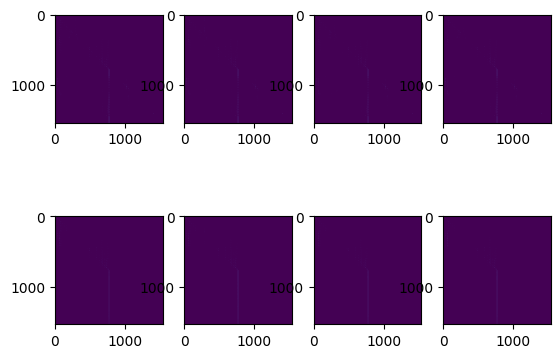

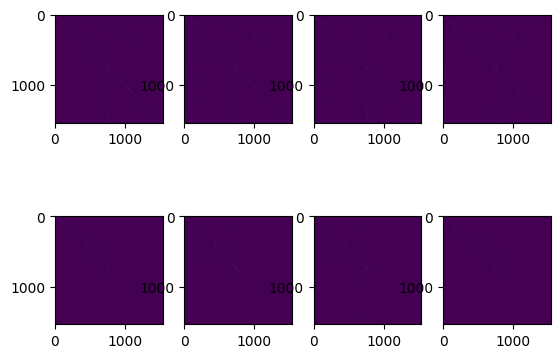

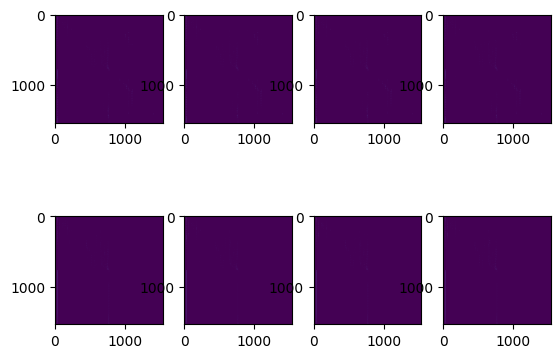

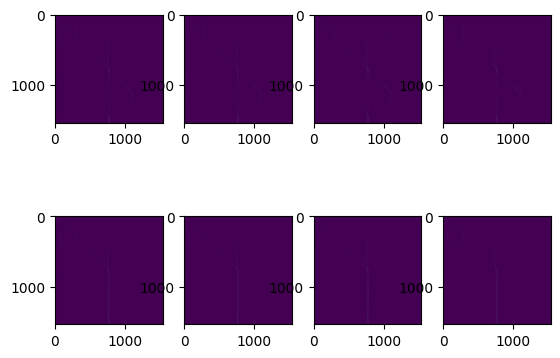

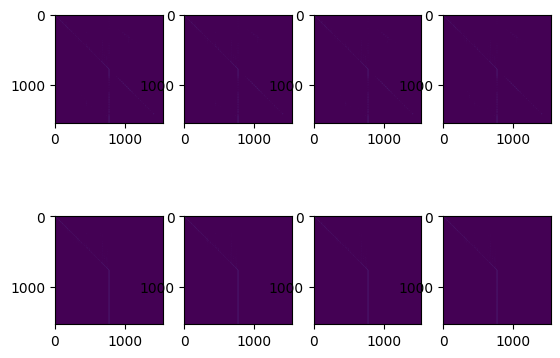

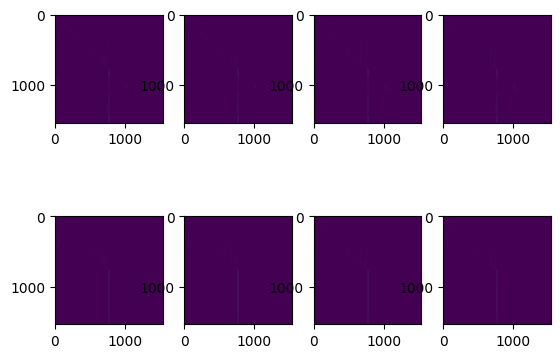

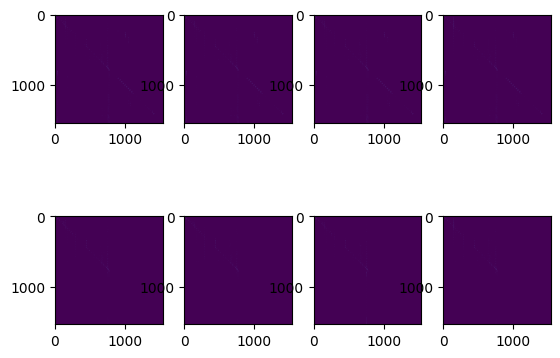

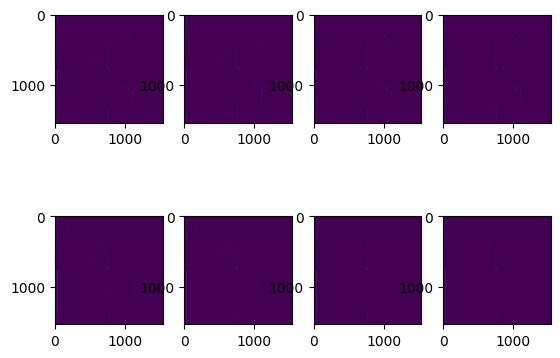

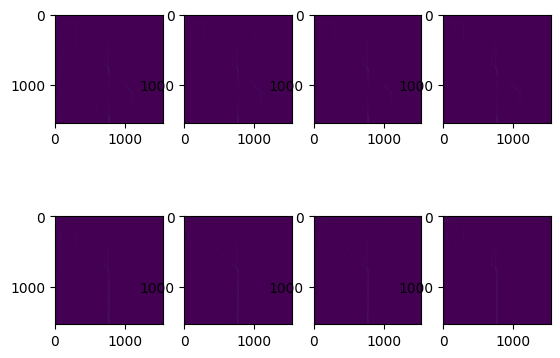

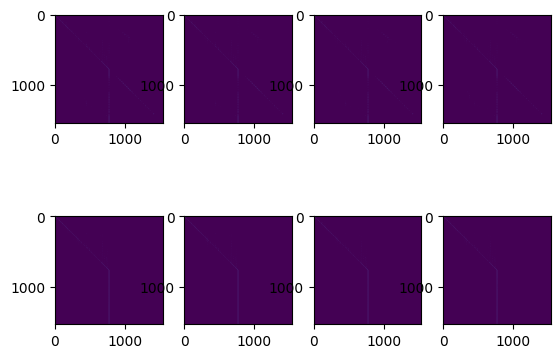

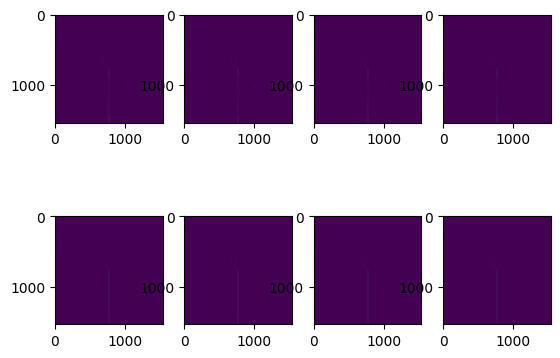

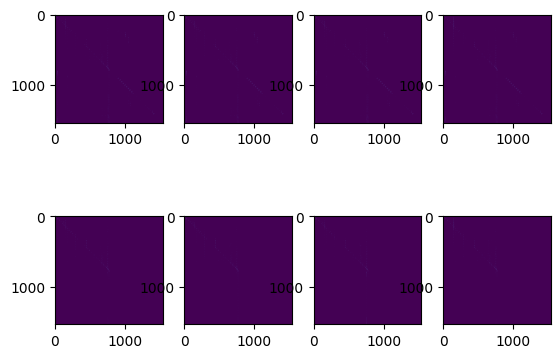

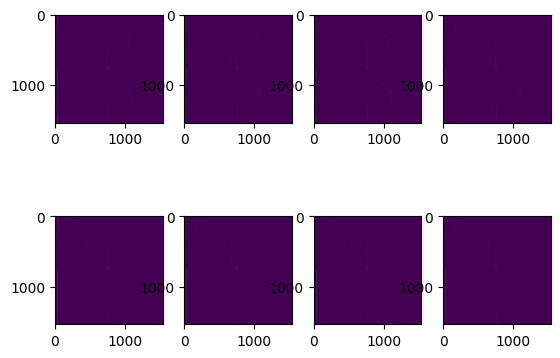

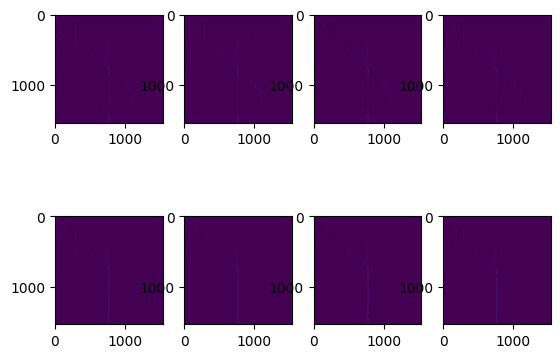

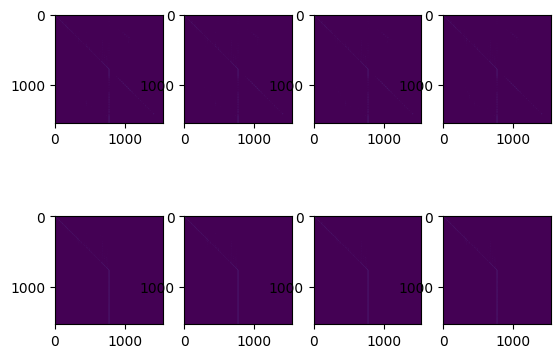

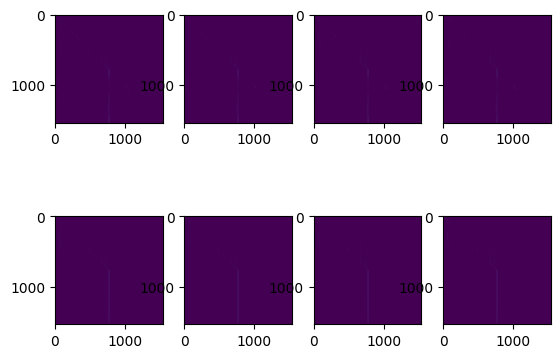

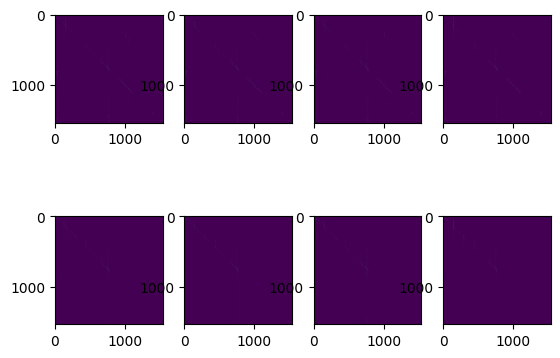

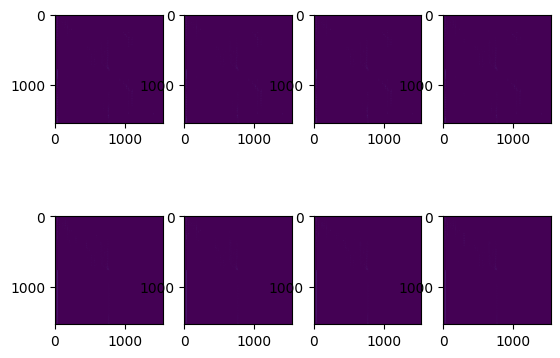

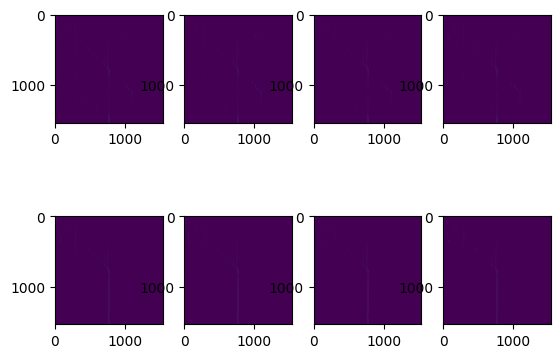

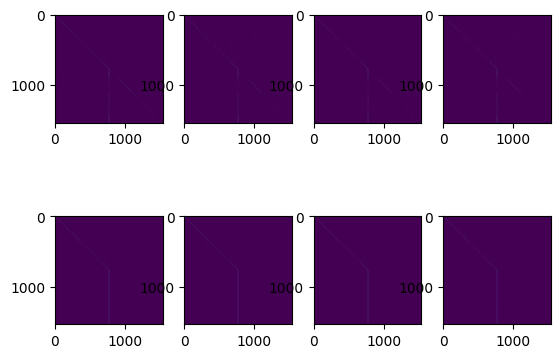

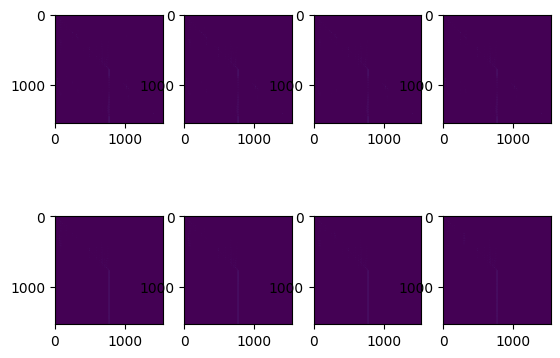

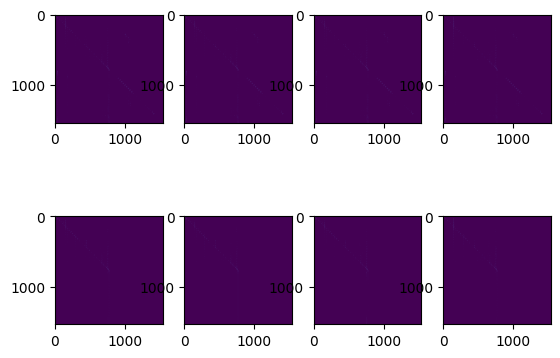

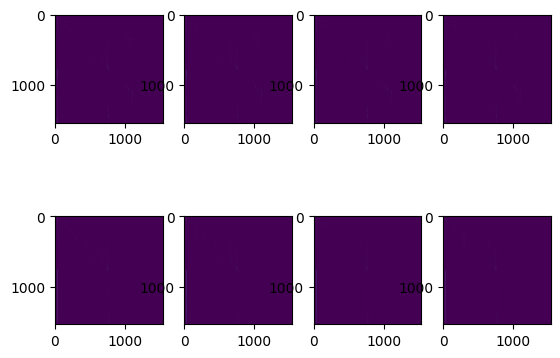

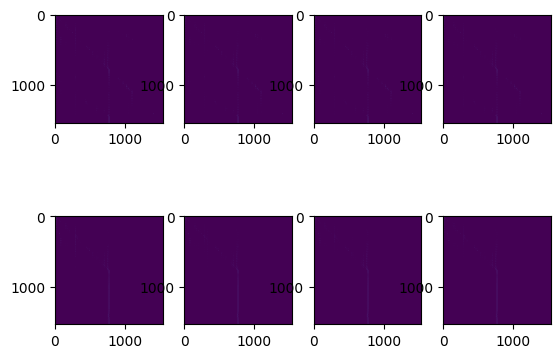

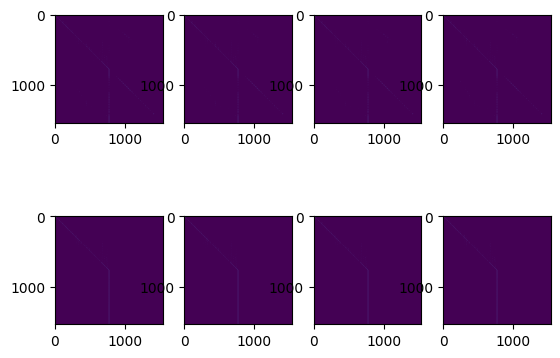

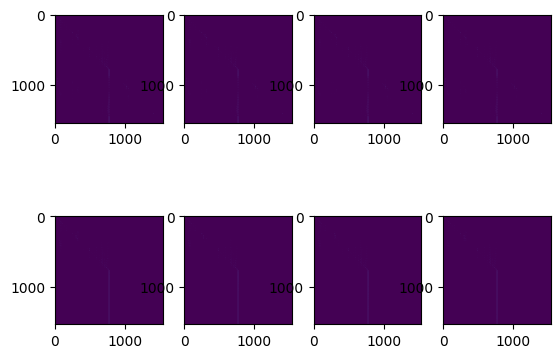

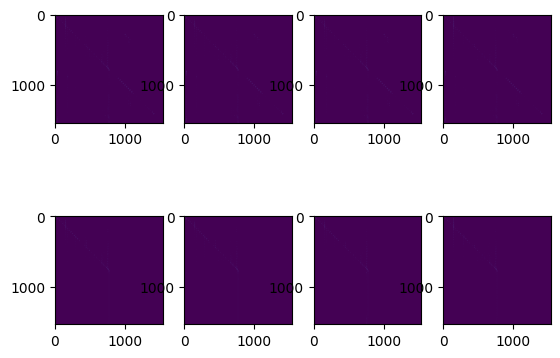

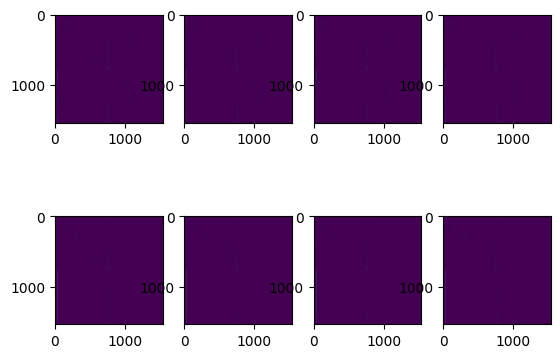

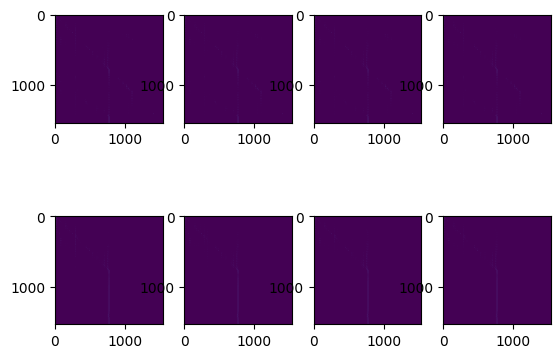

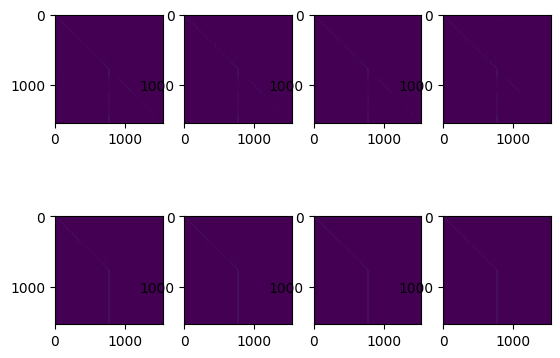

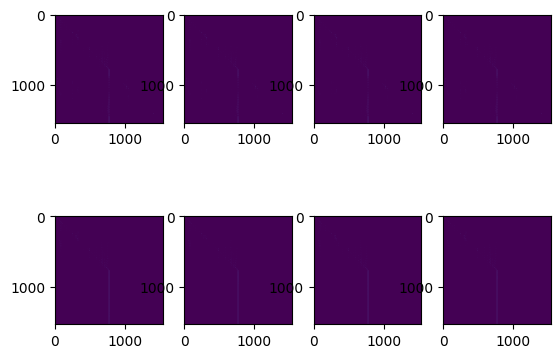

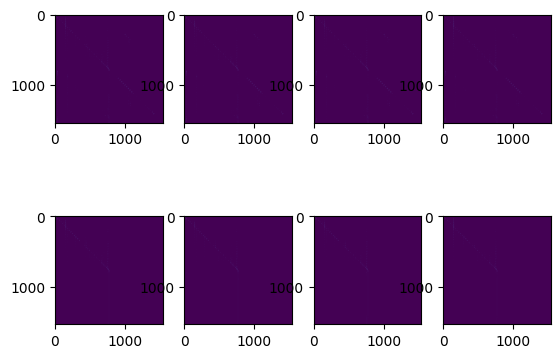

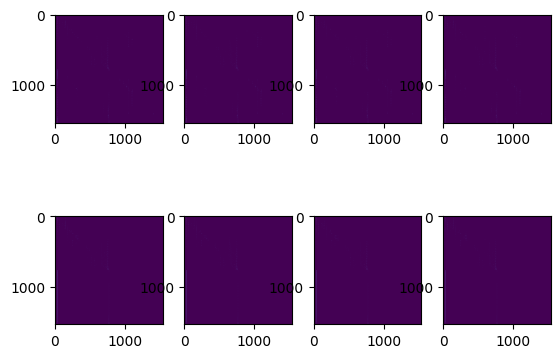

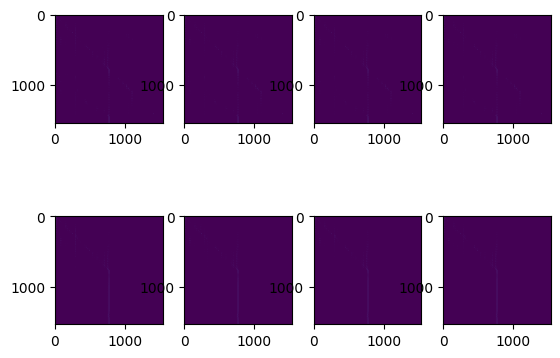

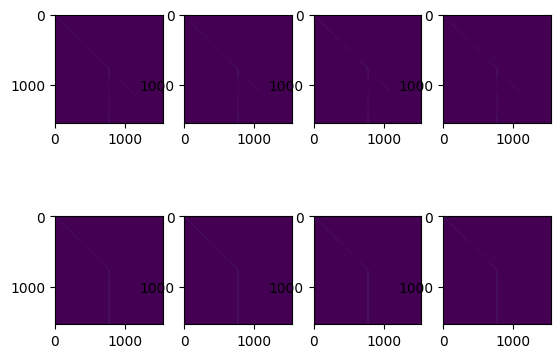

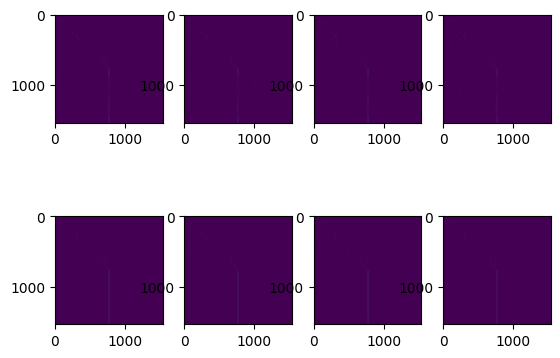

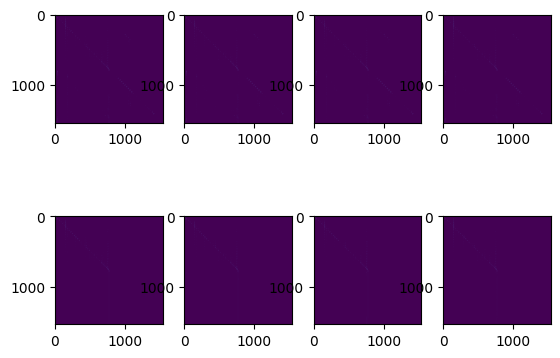

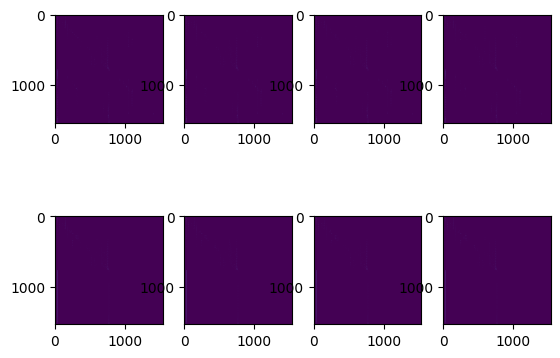

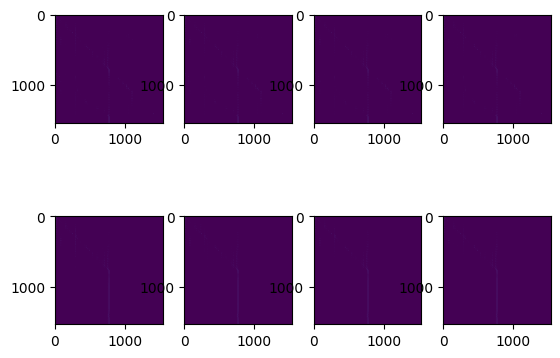

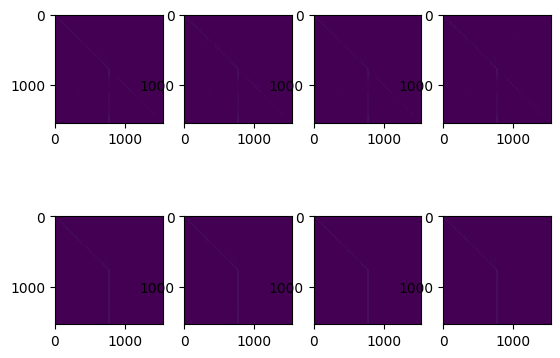

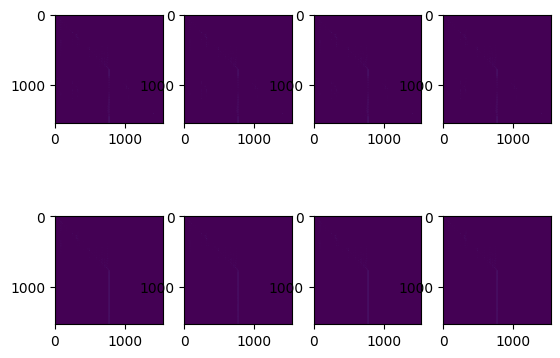

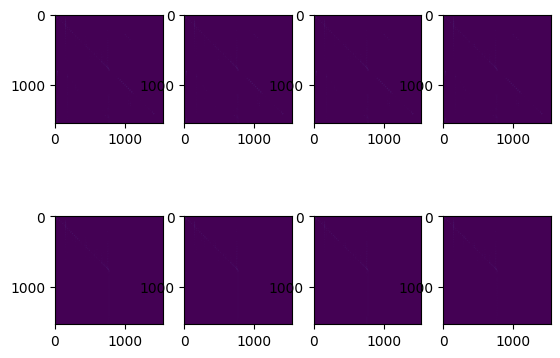

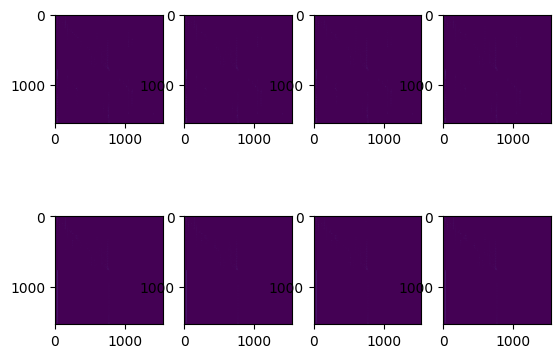

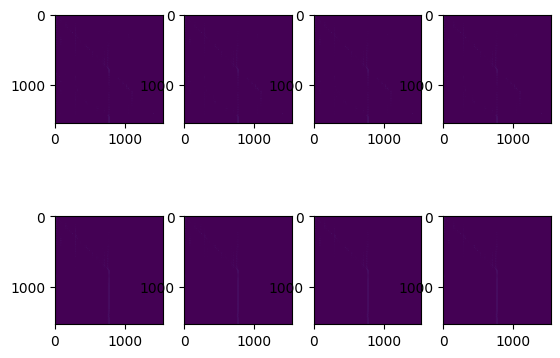

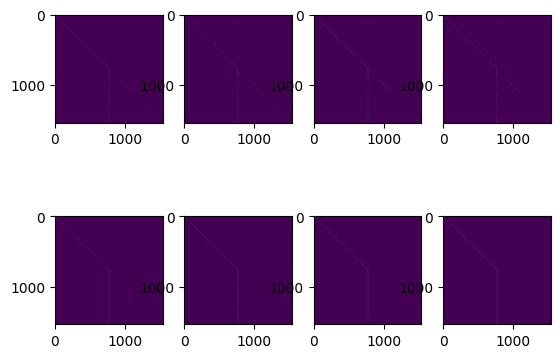

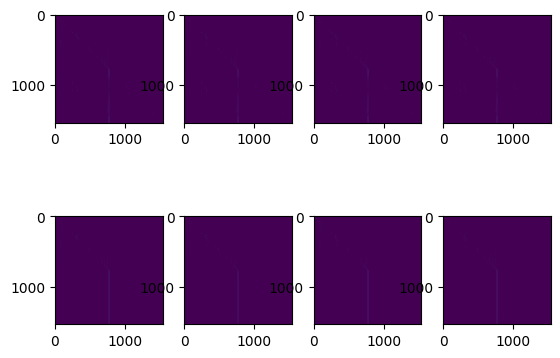

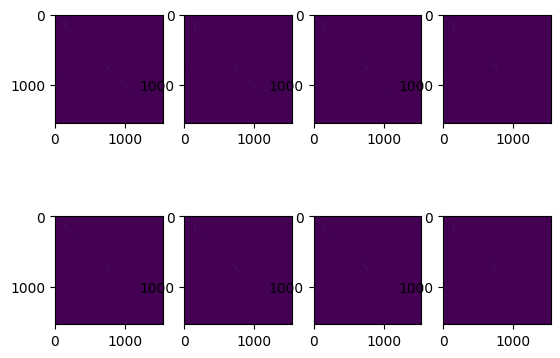

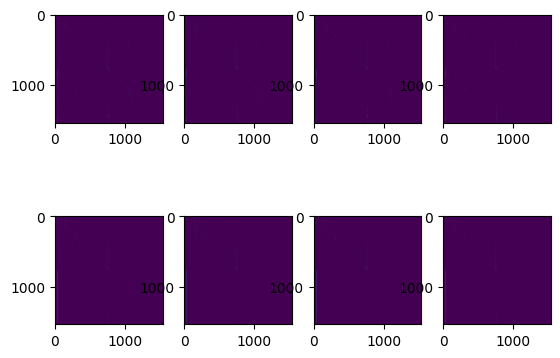

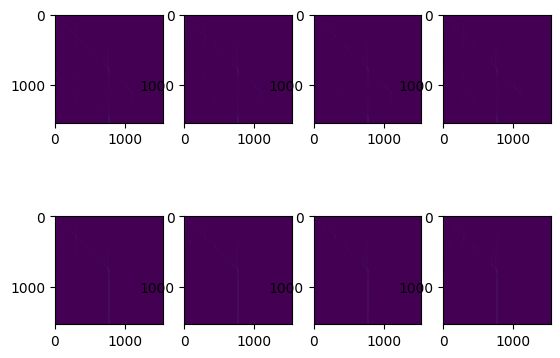

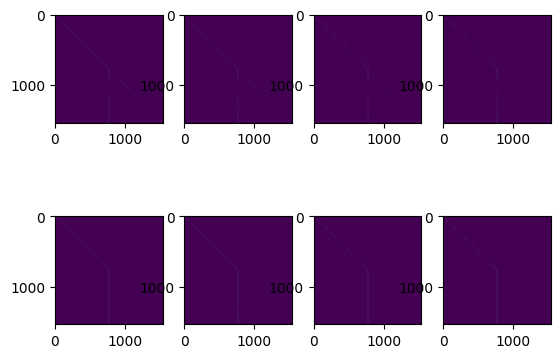

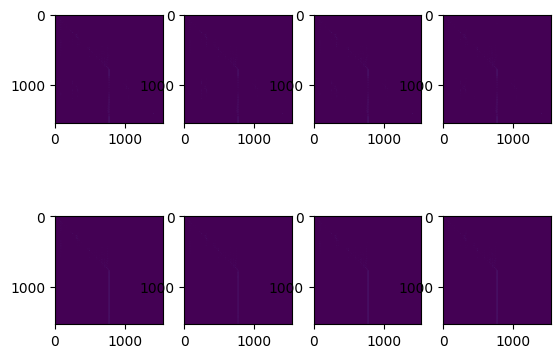

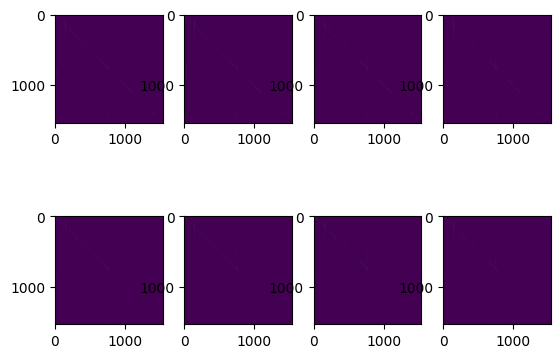

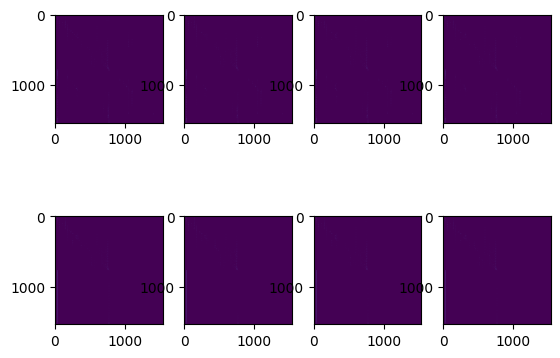

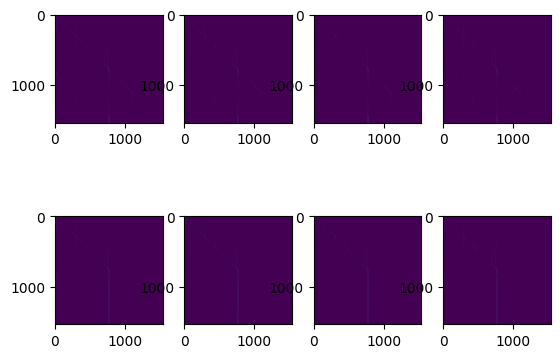

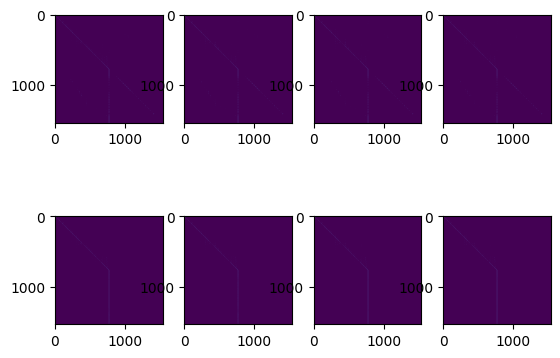

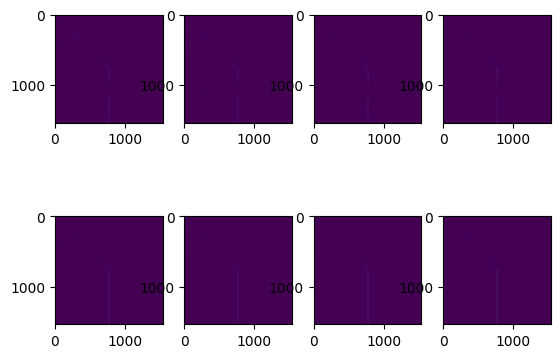

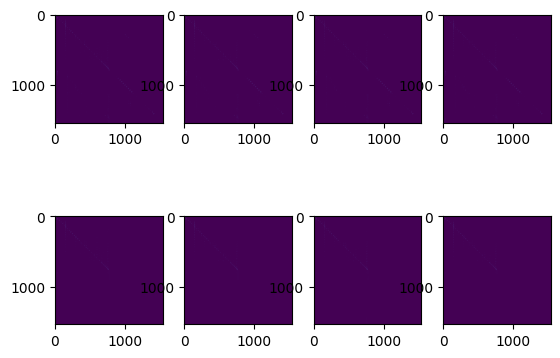

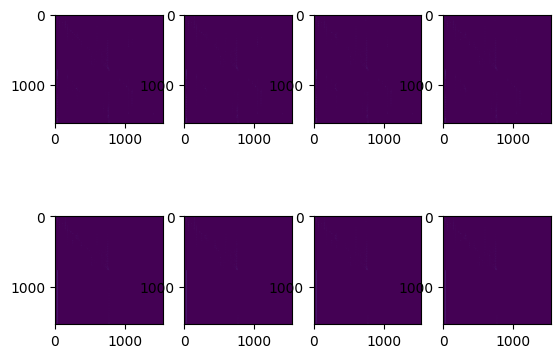

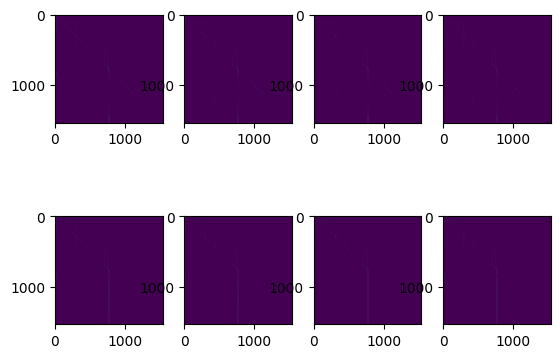

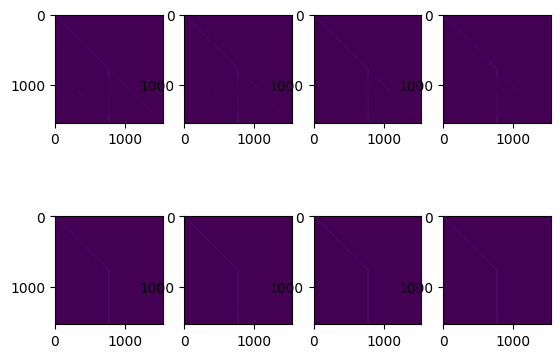

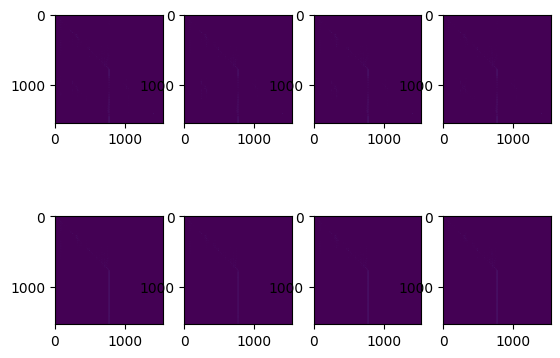

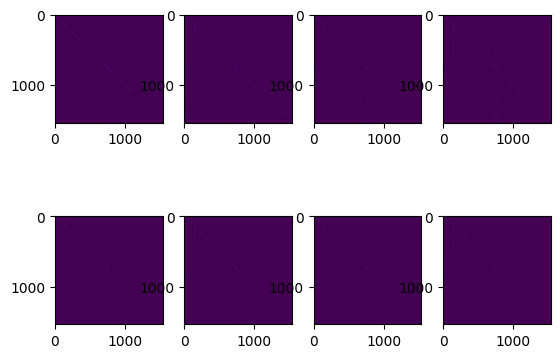

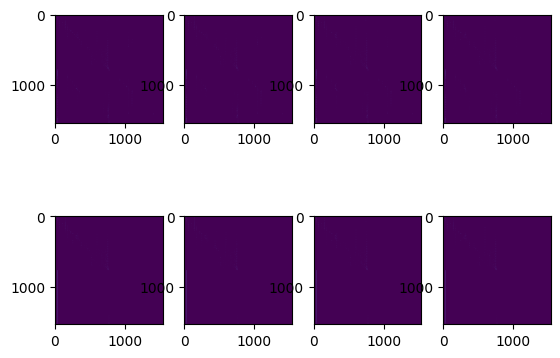

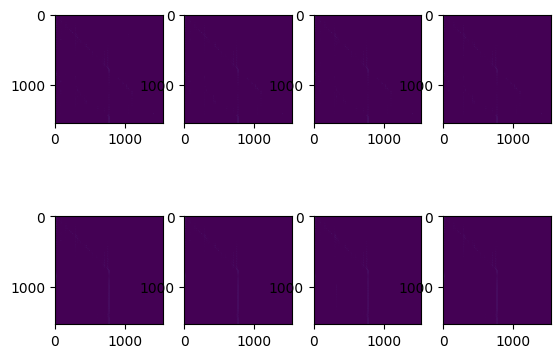

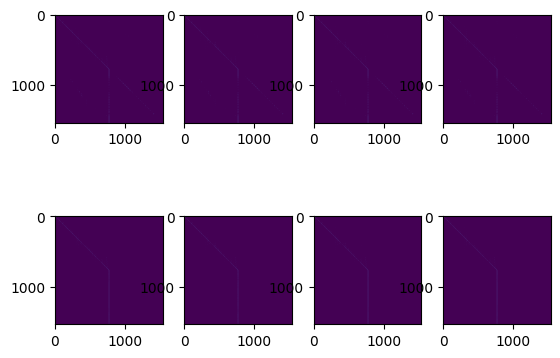

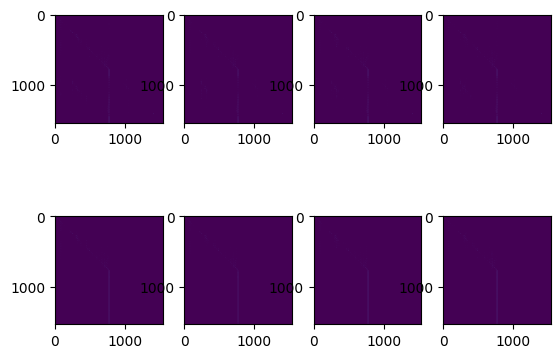

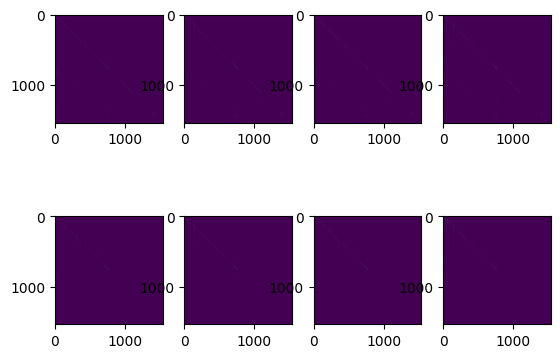

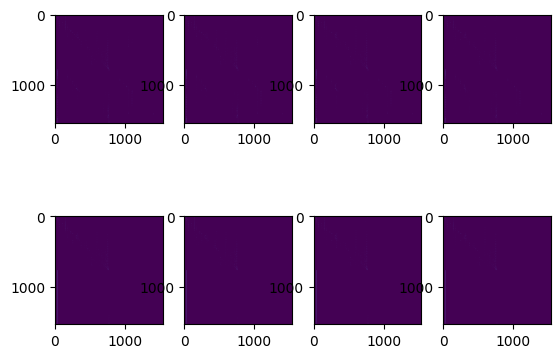

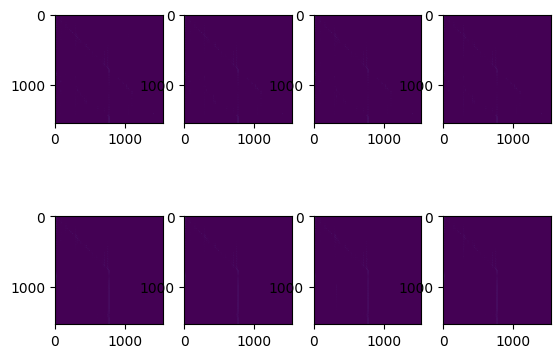

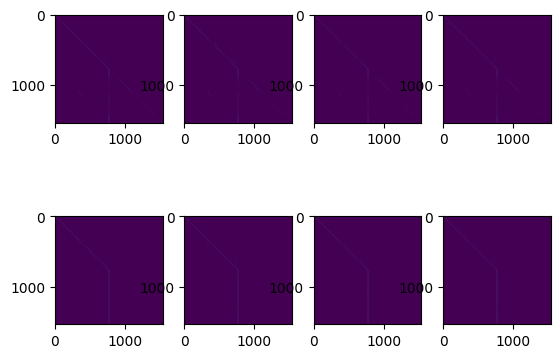

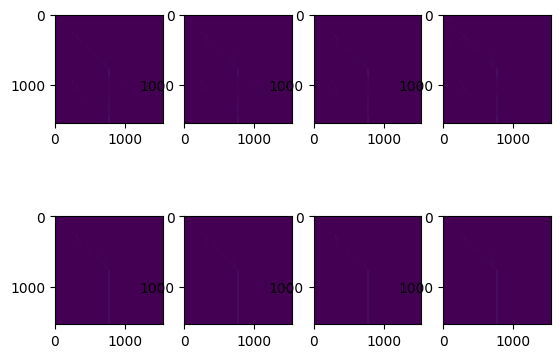

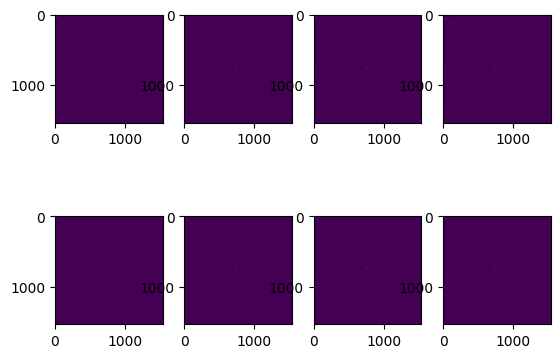

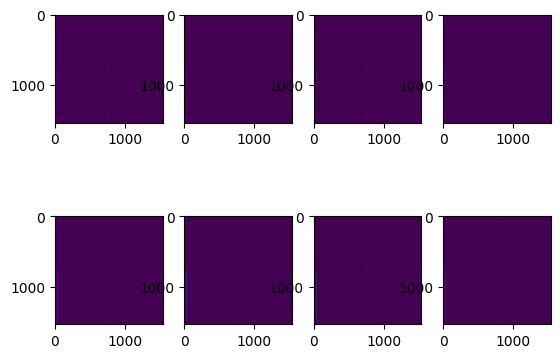

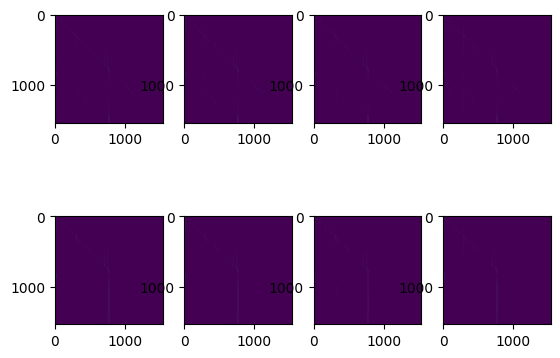

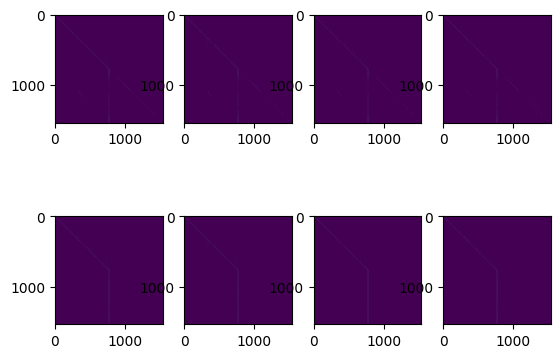

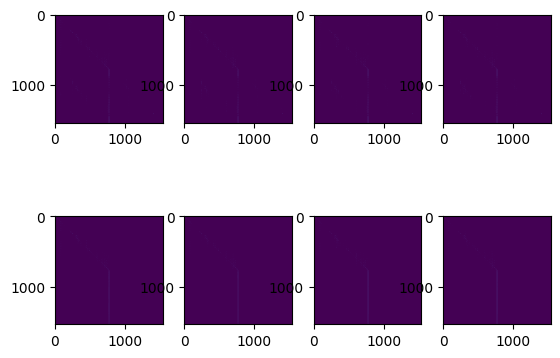

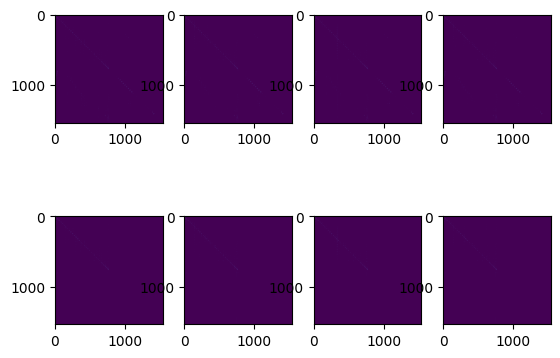

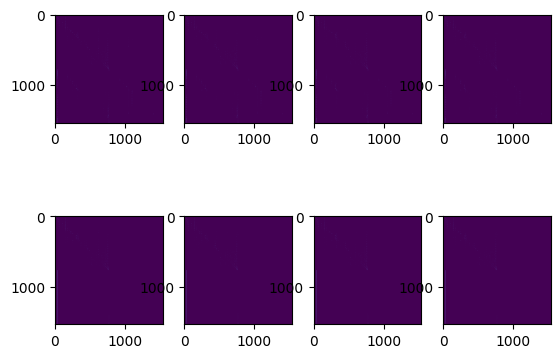

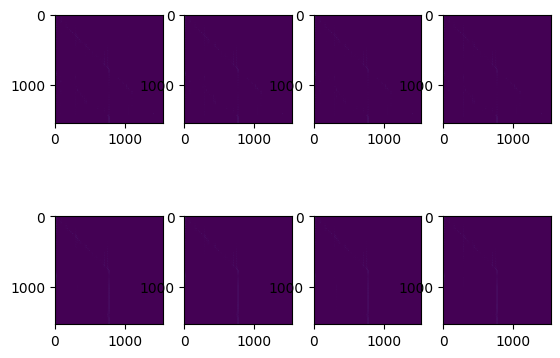

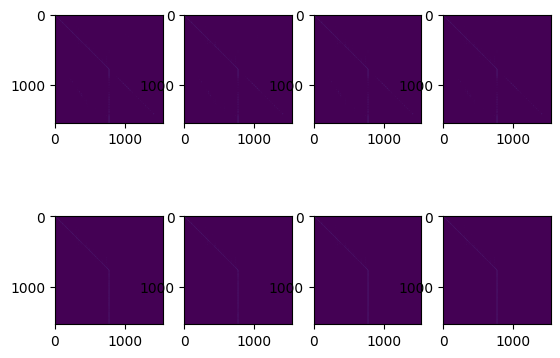

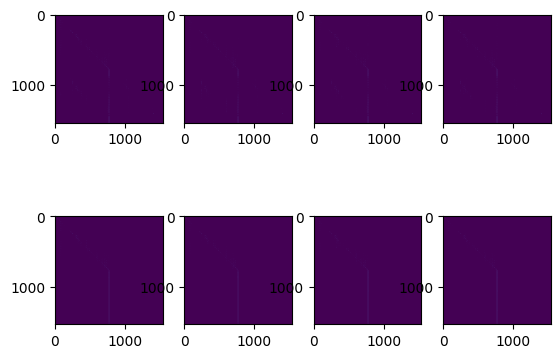

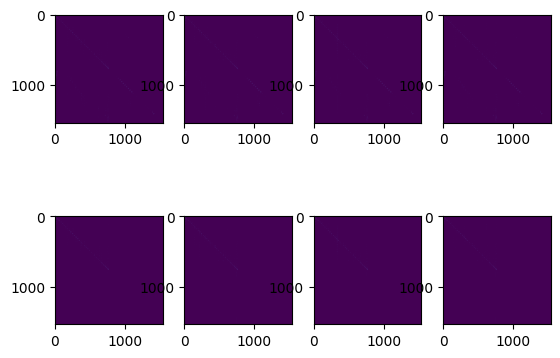

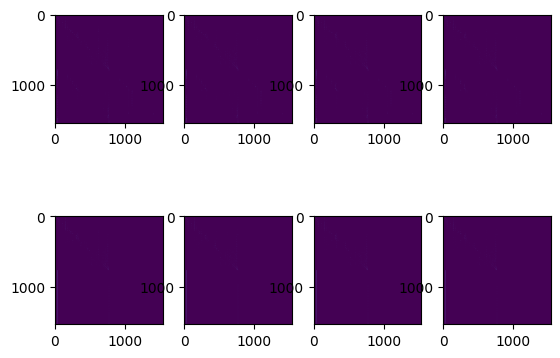

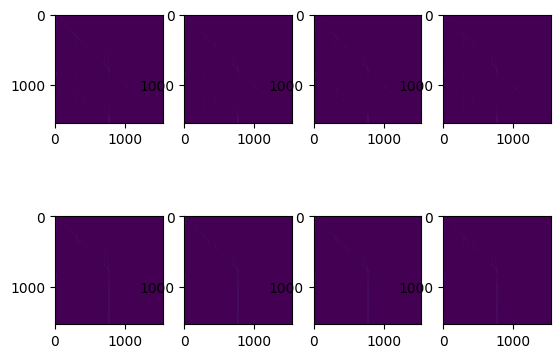

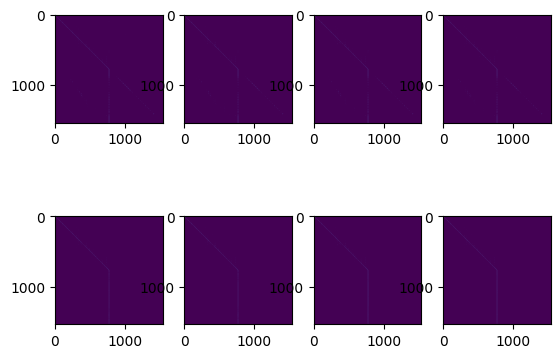

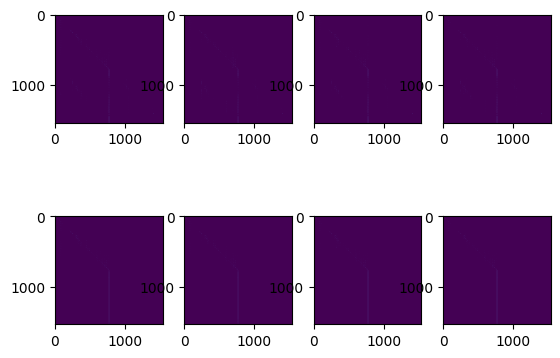

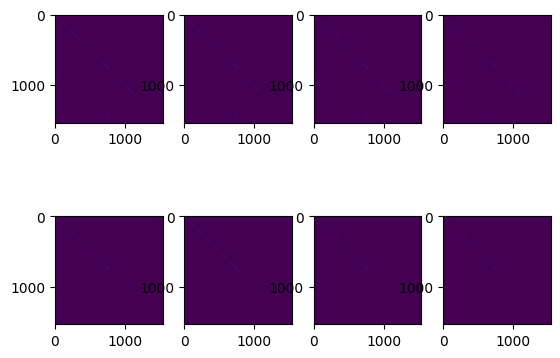

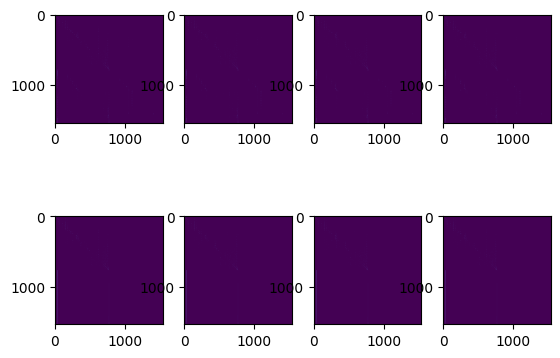

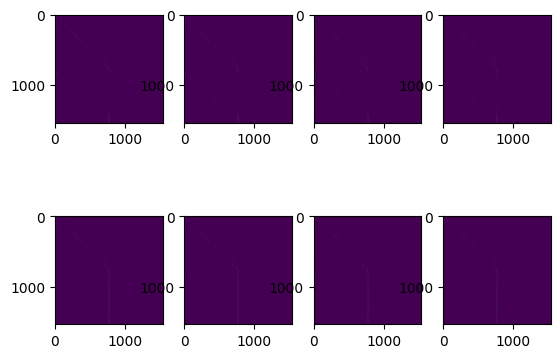

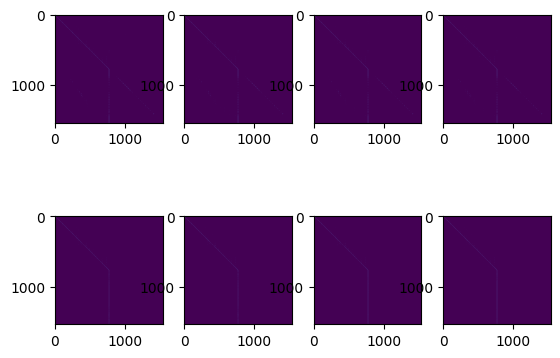

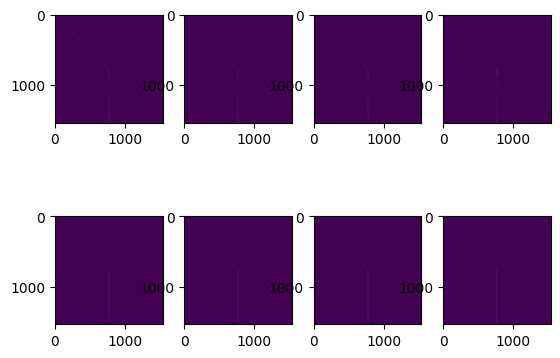

In [149]:
for i in range(low,high+1):
    attn=load(self_attn_20[i])
    for j in range(8):
        plt.subplot(2,4,j+1)
        plt.imshow(np.array(attn[j]))
    plt.show()

In [11]:
# 384=192*2 768=384
# 192*2 768*2 
for f in all_file:
    print(load(f).shape)

torch.Size([8, 384, 384])
torch.Size([8, 384, 384])
torch.Size([8, 384, 384])
torch.Size([8, 384, 384])
torch.Size([8, 384, 384])
torch.Size([8, 384, 384])
torch.Size([8, 384, 384])
torch.Size([8, 384, 384])
torch.Size([8, 384, 384])
torch.Size([8, 384, 384])
torch.Size([8, 384, 384])
torch.Size([8, 384, 384])
torch.Size([8, 384, 384])
torch.Size([8, 384, 384])
torch.Size([8, 384, 384])
torch.Size([8, 384, 384])
torch.Size([8, 384, 384])
torch.Size([8, 384, 384])
torch.Size([8, 384, 384])
torch.Size([8, 384, 384])


In [119]:
a=load(all_file[11])

In [120]:
a_pre=a[:,:768,:768]
a_post=a[:,768:,768:]
print(a_pre.shape,a_post.shape)

torch.Size([8, 768, 768]) torch.Size([8, 768, 768])


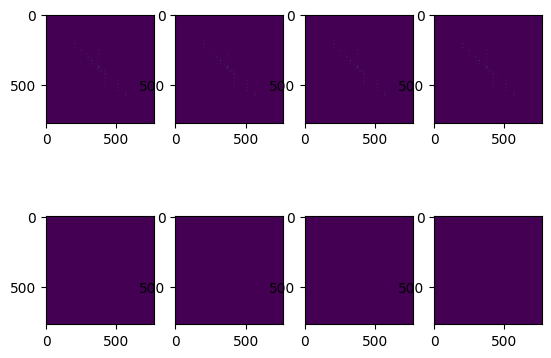

In [121]:
for i in range(8):
    a_arr=np.array(a_post[i])
    plt.subplot(2,4,i+1)
    plt.imshow(a_arr)
plt.show()

In [46]:
# 8 12288 2 => reshape(0,2,1) => view(None,None,h=128,w=96)
# 8 3072 2 => reshape(0,2,1) => view(None,None,h=64,w=48)
# 8 768 2 => reshape(0,2,1) => view(None,None,h=32,w=24)
# 8 192 2 => reshape(0,2,1) => view(None,None,h=16,w=12)
def reshape_view(attn:torch.Tensor,h,w):
    tmp=attn.transpose(2,1)
    # print(tmp.shape) # torch.Size([8, 2, 12288])
    tmp=tmp.view(8,-1,h,w)
    return tmp
# at=torch.ones((8,12288,2))
# reshape_view(at,128,96).shape  # torch.Size([8, 2, 128, 96])

In [5]:
def load(fname):
    return torch.load(f'{prefix}{fname}',map_location=torch.device('cpu'))
def reshape_view(attn:torch.Tensor,h,w):
    return attn.transpose(2,1).view(8,-1,h,w)
def bianli(low,high,h,w):
    for i in range(low,high+1):
        fname=all_file[i]
        c=load(fname)
        c_re=reshape_view(c,h,w)
        vton,garm = c_re.chunk(2,dim=1) # torch.Size([8, 1, 128, 96])
        # v1,v2 = garm.chunk(2) # torch.Size([4, 1, 128, 96])
        print(f'No.{i} >0 :: vton {(vton>0).sum()}  garm?? {(garm>0).sum()}')
        print(f'No.{i} 1> :: vton {(1>vton).sum()}  garm?? {(1>garm).sum()}')
        print(f'No.{i} ==0:: vton {(vton==0).sum()} garm?? {(garm==0).sum()}')

In [9]:
prefix = '/public/home/yangzhe/ltt/lsj/OOTD_attn_qkv2/'
all_file=os.listdir(prefix)
all_file=sorted(all_file)
# 336 = 16*21 
print(len(all_file))

321


In [10]:
all_file[-1]

'mask.pth'

In [11]:
mask=load(all_file[-1])
mask[0,0,:,:].shape

torch.Size([128, 96])

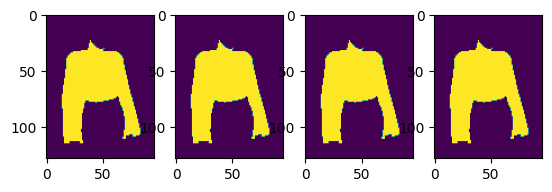

In [171]:
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(np.array(mask[i,0,:,:]))
plt.show()

In [12]:
# mask_latent = torch.nn.functional.interpolate(
#     mask.float(), size=(32, 24)
# )
mask_latent = torch.nn.functional.interpolate(
    mask.float(), size=(32, 24),mode='bilinear', align_corners=False
)
mask_latent.shape

torch.Size([4, 1, 32, 24])

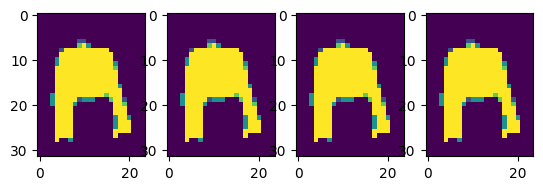

In [185]:
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(np.array(mask_latent[i,0,:,:]))
plt.show()

In [3]:
'''
0~99  12288
100~119 192
120~219 3072
220~319 768
'''
# low,high=0,99
# low,high=100,119
# low,high=120,219
low,high=220,319
# h,w=128,96
# h,w=16,12
# h,w=64,48
h,w=32,24
cross_attn=all_file[:]
print(cross_attn[high])

cross-768-1716617552887.pth


In [6]:
# 存储attnmap
attnmap_real=[]
for i in range(low,high+1):
    cattn = load(cross_attn[i])
    cattn_re=reshape_view(cattn,h,w)  # torch.Size([8, 2, 32, 24])

    noise,vton=cattn_re.chunk(2,dim=1)
    n1,n2=noise.chunk(2)
    v1,v2=vton.chunk(2)
    # print(f'No.{i} {n1.shape} {v1.shape}')
    attnmap_real.append(n1)
    attnmap_real.append(n2)


In [8]:
attnmap_real[0].shape

torch.Size([4, 1, 32, 24])

In [ ]:
for i in range(low,high+1):
    cattn = load(cross_attn[i])
    cattn_re=reshape_view(cattn,h,w)  # torch.Size([8, 2, 32, 24])

    noise,vton=cattn_re.chunk(2,dim=1)
    n1,n2=noise.chunk(2)
    v1,v2=vton.chunk(2)
    print(f'No.{i} {n1.shape} {v1.shape}')
    # if (v1>0).sum()==0:
    #     continue
    # print(f'No.{i} {(v1>0).sum()} {(v1==1).sum()} {(v1==0).sum()}')
    # print(f'No.{i} {(v2>0).sum()} {(v2==1).sum()} {(v2==0).sum()}')
    # print(f'No.{i} {(n1>0).sum()} {(n1==1).sum()} {(n1==0).sum()}')
    # print(f'No.{i} {(n2>0).sum()} {(n2==1).sum()} {(n2==0).sum()}')
    for j in range(4):
        plt.subplot(4,4,j+1)
        plt.imshow(np.array(v1[j][0]))
    for j in range(4):
        plt.subplot(4,4,4+j+1)
        plt.imshow(np.array(v2[j][0]))
    # 存储 n1 n2
    for j in range(4):
        plt.subplot(4,4,4*2+j+1)
        plt.imshow(np.array(n1[j][0]))
    for j in range(4):
        plt.subplot(4,4,4*3+j+1)
        plt.imshow(np.array(n2[j][0]))
    plt.show()

No.120 torch.Size([4, 1, 64, 48]) torch.Size([4, 1, 64, 48])


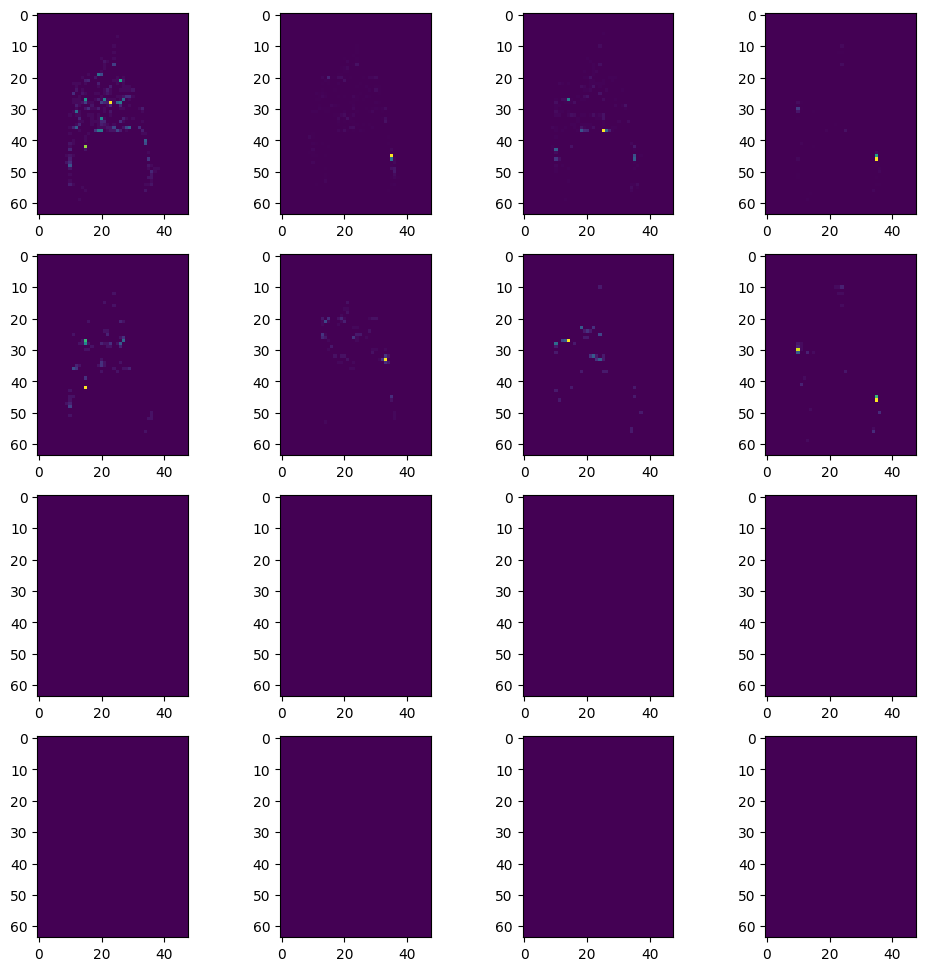

No.121 torch.Size([4, 1, 64, 48]) torch.Size([4, 1, 64, 48])


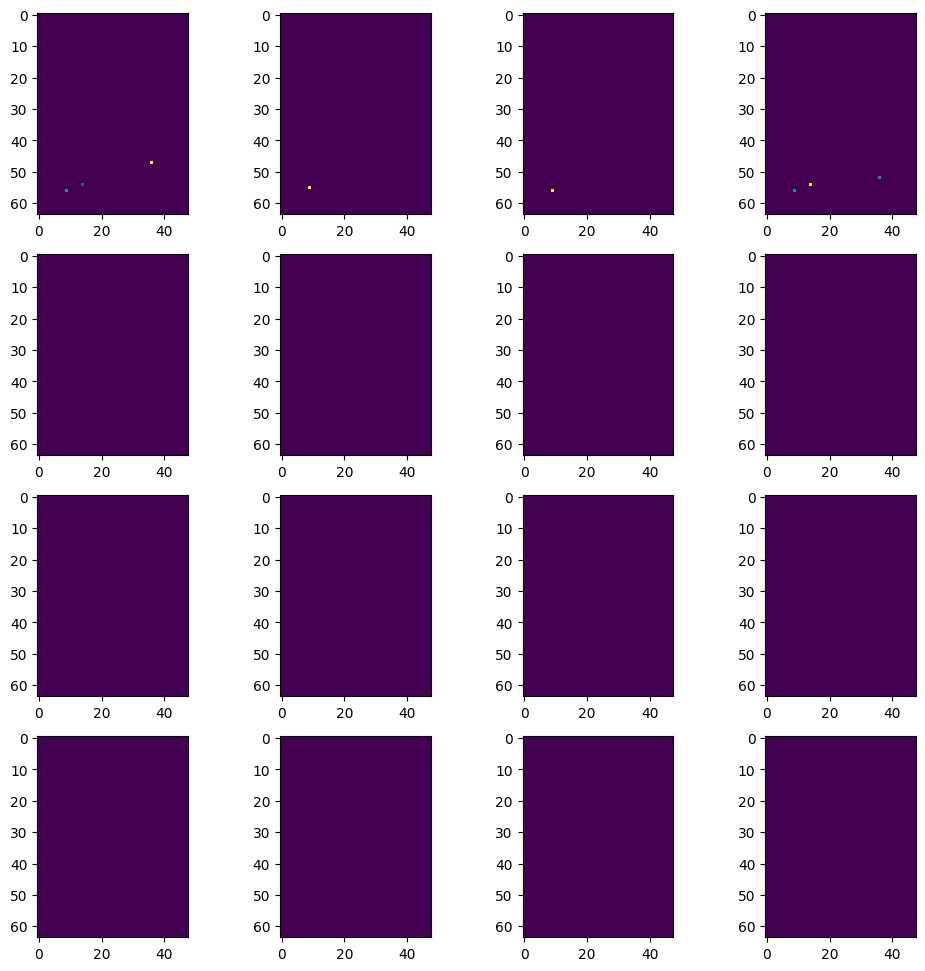

No.122 torch.Size([4, 1, 64, 48]) torch.Size([4, 1, 64, 48])


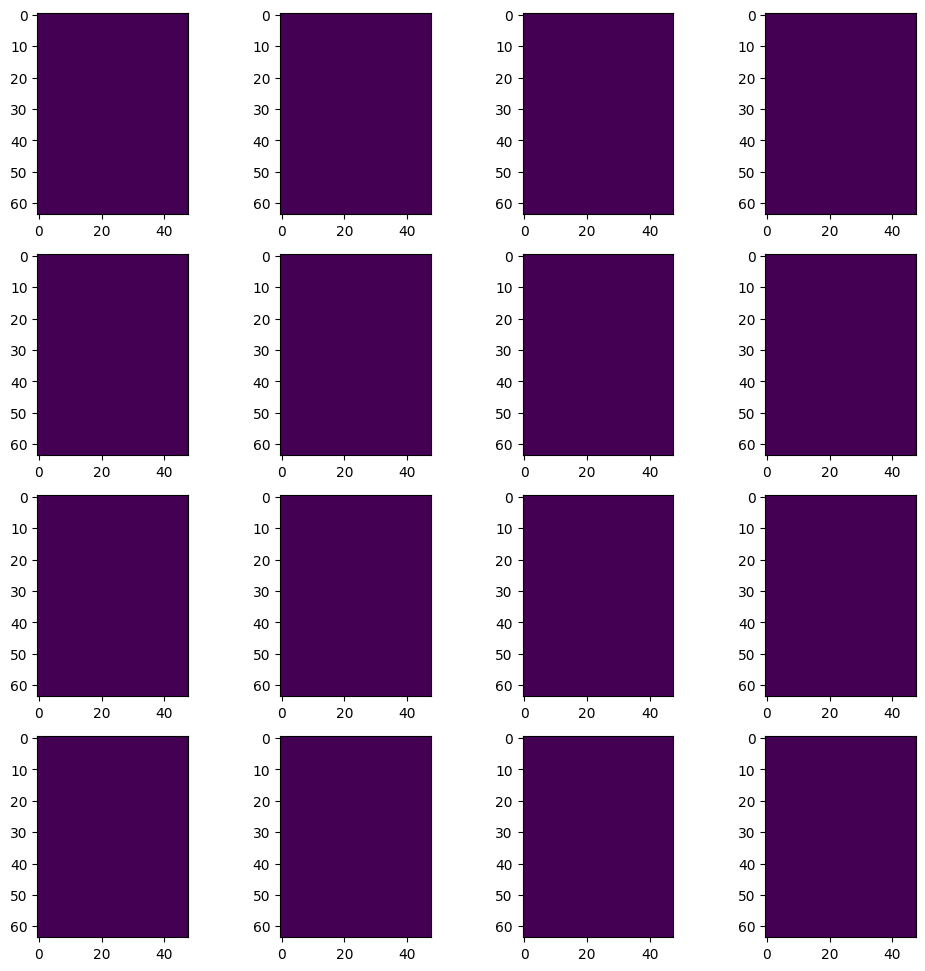

No.123 torch.Size([4, 1, 64, 48]) torch.Size([4, 1, 64, 48])


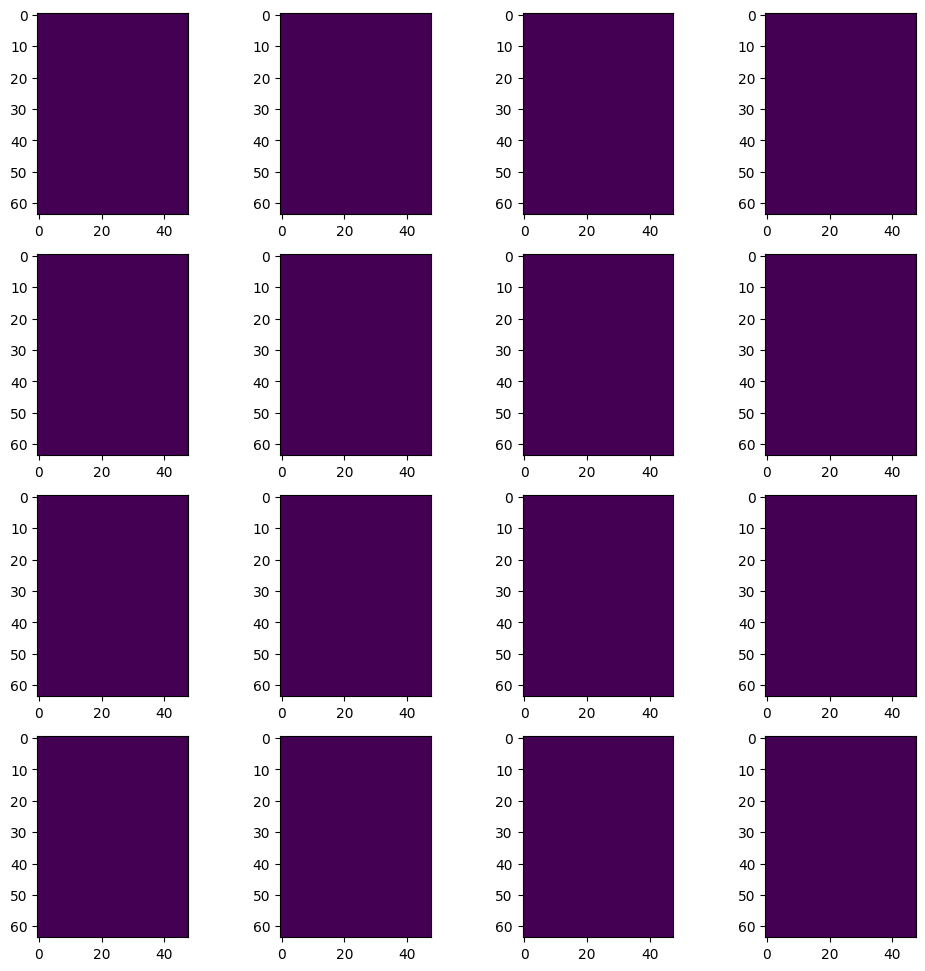

No.124 torch.Size([4, 1, 64, 48]) torch.Size([4, 1, 64, 48])


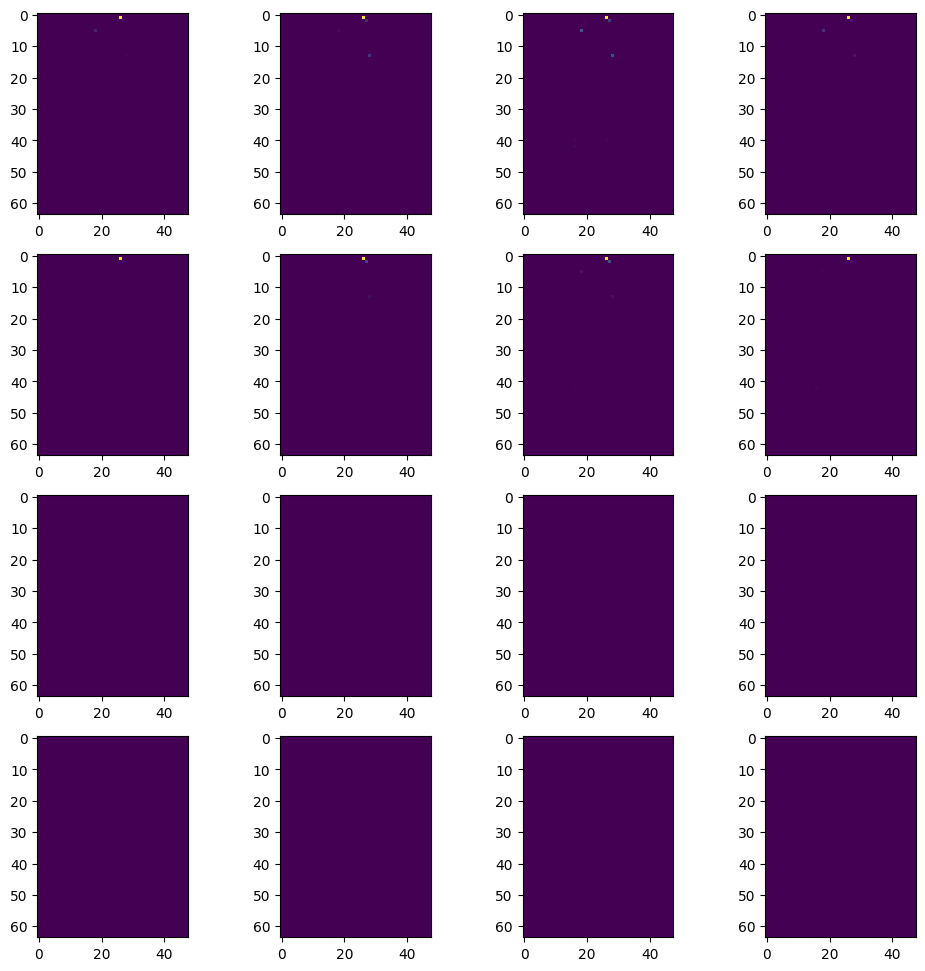

No.125 torch.Size([4, 1, 64, 48]) torch.Size([4, 1, 64, 48])


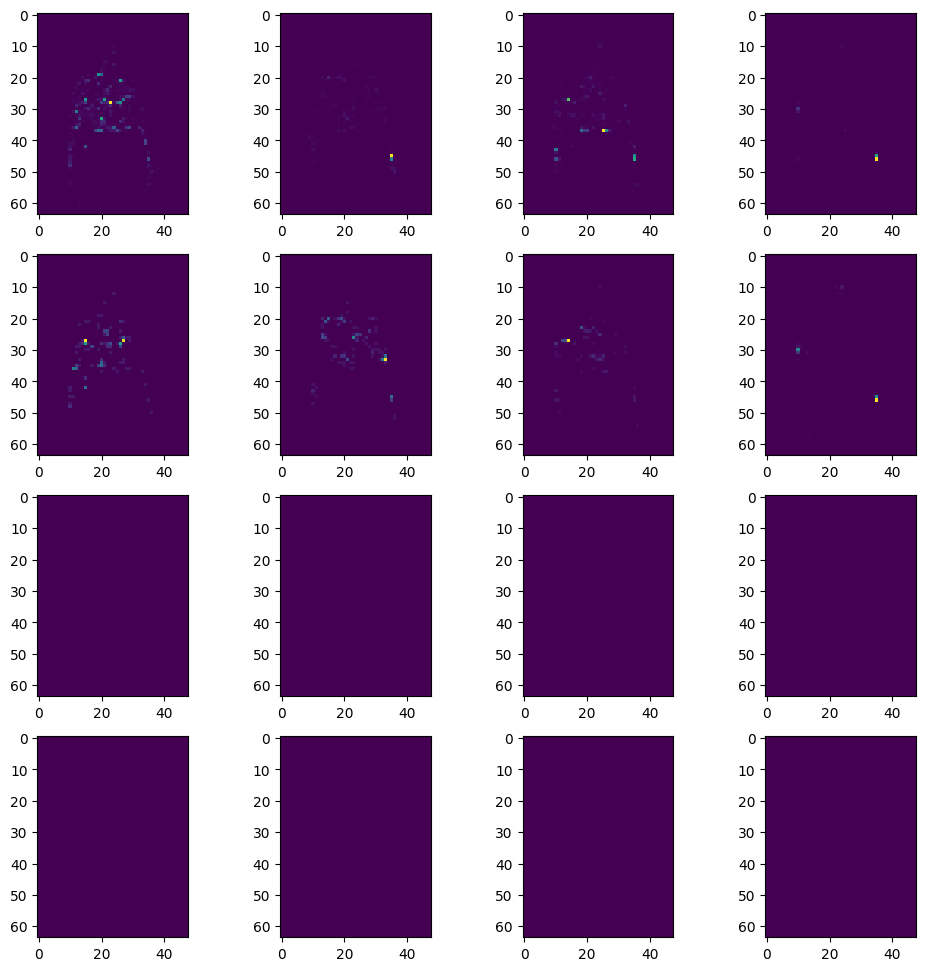

No.126 torch.Size([4, 1, 64, 48]) torch.Size([4, 1, 64, 48])


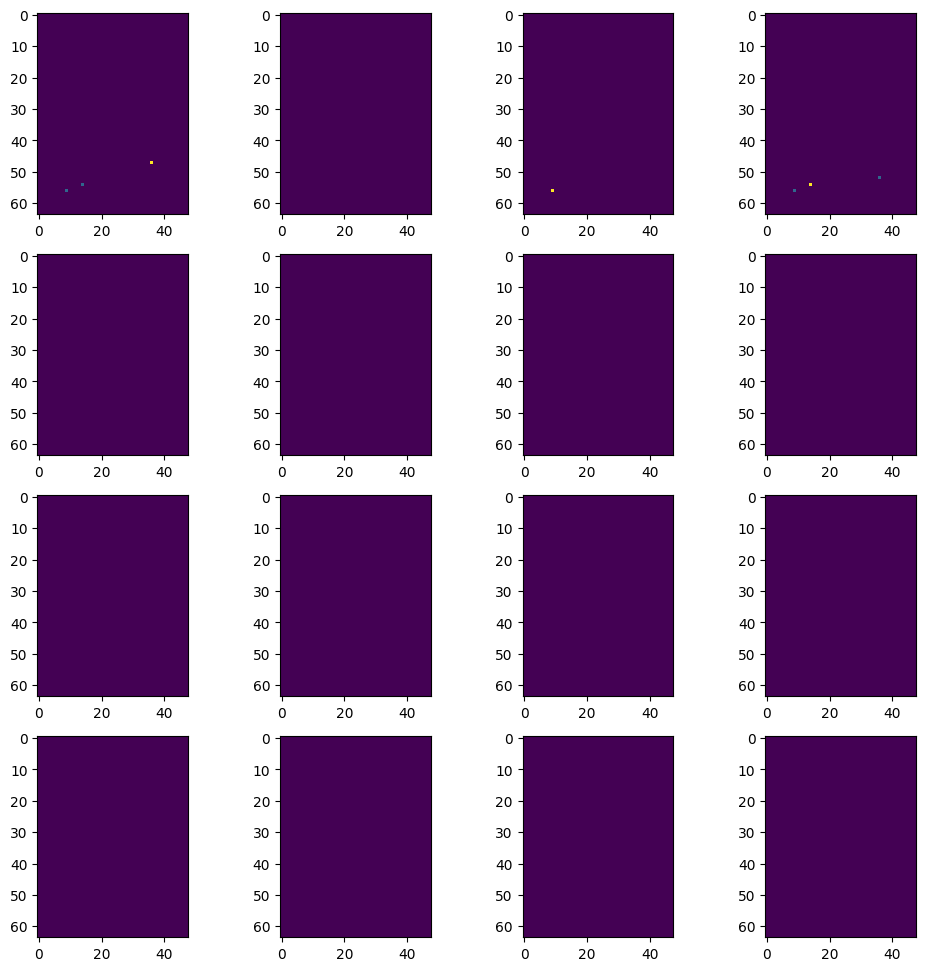

No.127 torch.Size([4, 1, 64, 48]) torch.Size([4, 1, 64, 48])


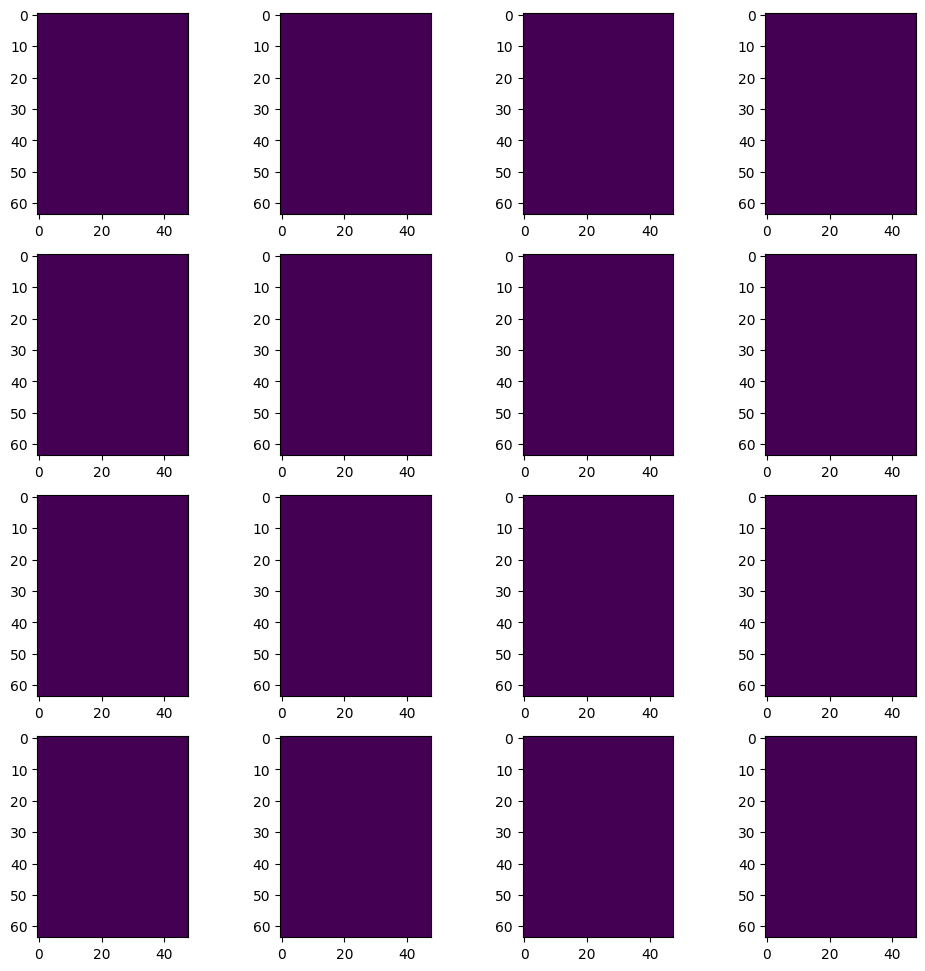

No.128 torch.Size([4, 1, 64, 48]) torch.Size([4, 1, 64, 48])


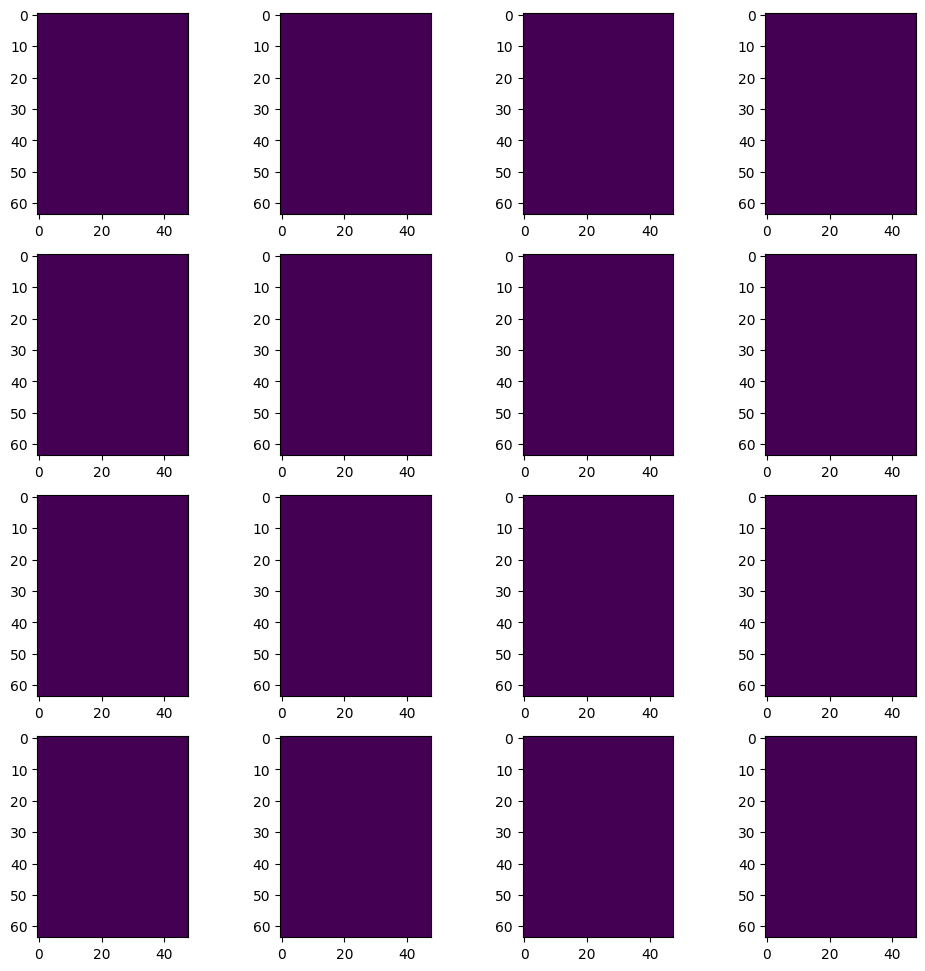

No.129 torch.Size([4, 1, 64, 48]) torch.Size([4, 1, 64, 48])


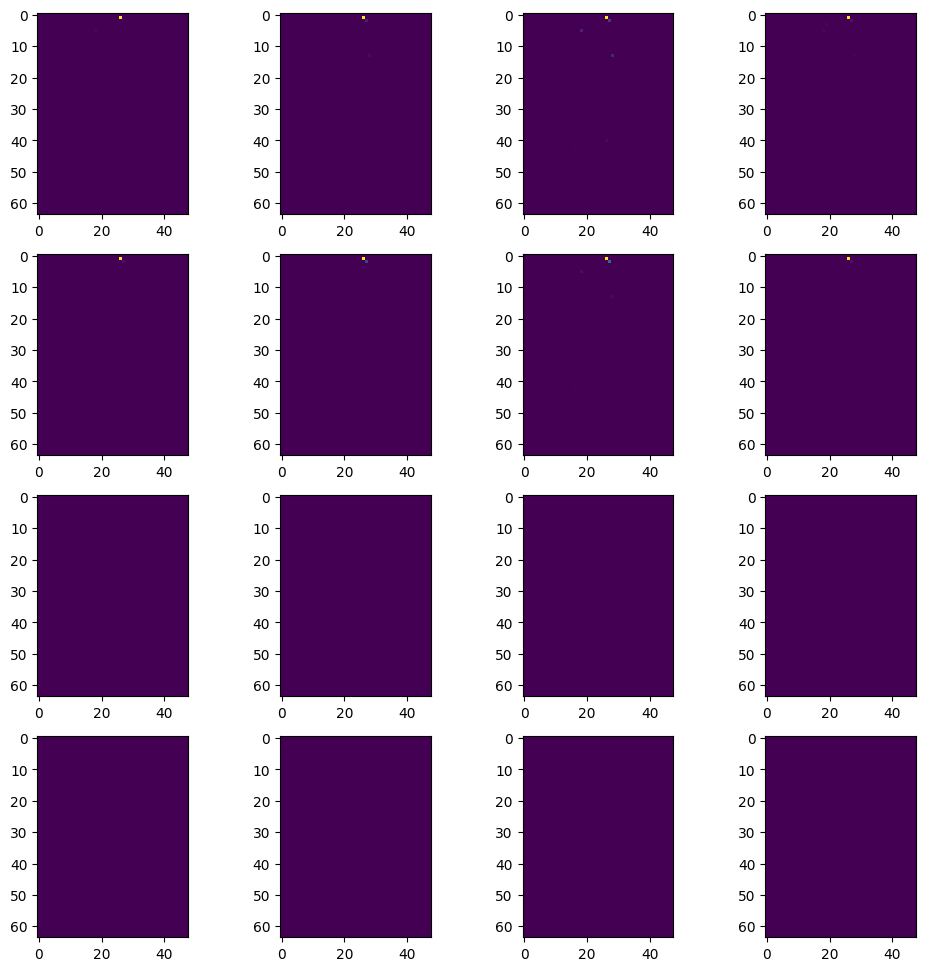

No.130 torch.Size([4, 1, 64, 48]) torch.Size([4, 1, 64, 48])


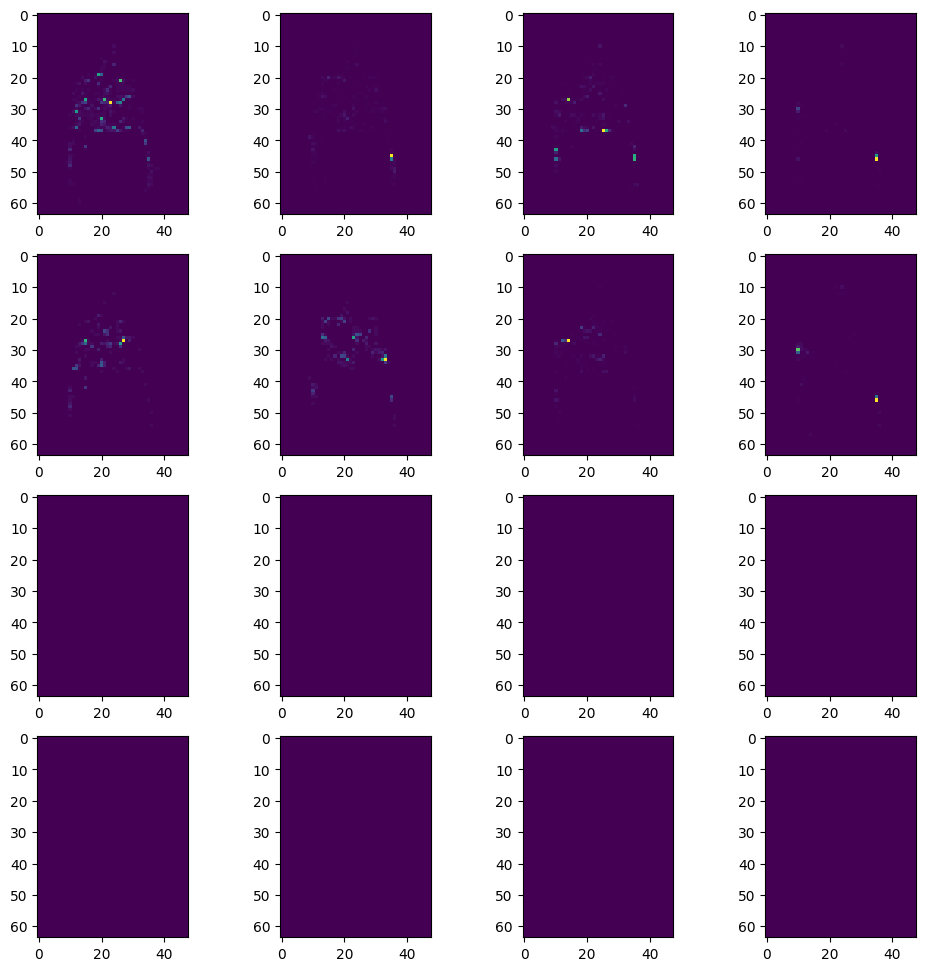

No.131 torch.Size([4, 1, 64, 48]) torch.Size([4, 1, 64, 48])


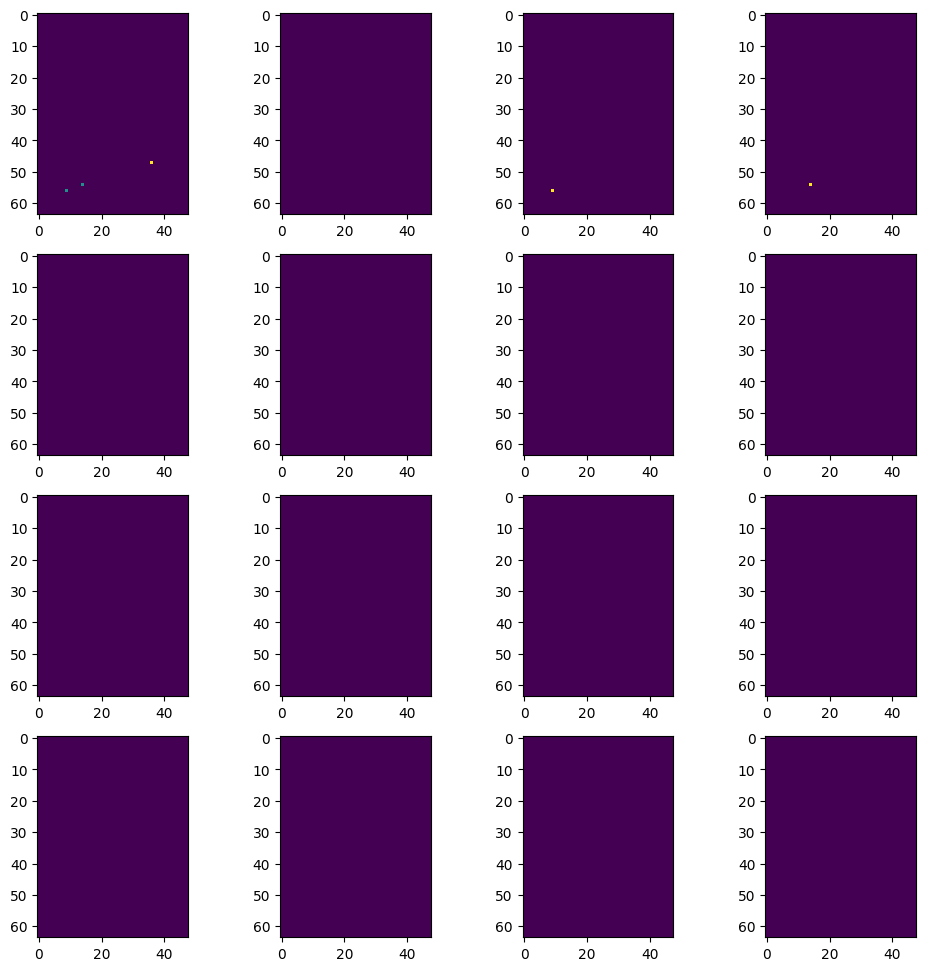

In [155]:
for i in range(low,high+1):
    cattn = load(cross_attn[i])
    cattn_re=reshape_view(cattn,h,w)  # torch.Size([8, 2, 128, 96])

    noise,vton=cattn_re.chunk(2,dim=1)
    n1,n2=noise.chunk(2)
    v1,v2=vton.chunk(2)
    print(f'No.{i} {n1.shape} {v1.shape}')
    # if (v1>0).sum()==0:
    #     continue
    # print(f'No.{i} {(v1>0).sum()} {(v1==1).sum()} {(v1==0).sum()}')
    # print(f'No.{i} {(v2>0).sum()} {(v2==1).sum()} {(v2==0).sum()}')
    # print(f'No.{i} {(n1>0).sum()} {(n1==1).sum()} {(n1==0).sum()}')
    # print(f'No.{i} {(n2>0).sum()} {(n2==1).sum()} {(n2==0).sum()}')
    plt.figure(figsize=(12,12))
    for j in range(4):
        plt.subplot(4,4,j+1)
        plt.imshow(np.array(v1[j][0]))
    for j in range(4):
        plt.subplot(4,4,4+j+1)
        plt.imshow(np.array(v2[j][0]))
    for j in range(4):
        plt.subplot(4,4,4*2+j+1)
        plt.imshow(np.array(n1[j][0]))
    for j in range(4):
        plt.subplot(4,4,4*3+j+1)
        plt.imshow(np.array(n2[j][0]))
    plt.show()
    if i > low+10:
        break

No.0 torch.Size([4, 1, 128, 96]) torch.Size([4, 1, 128, 96])


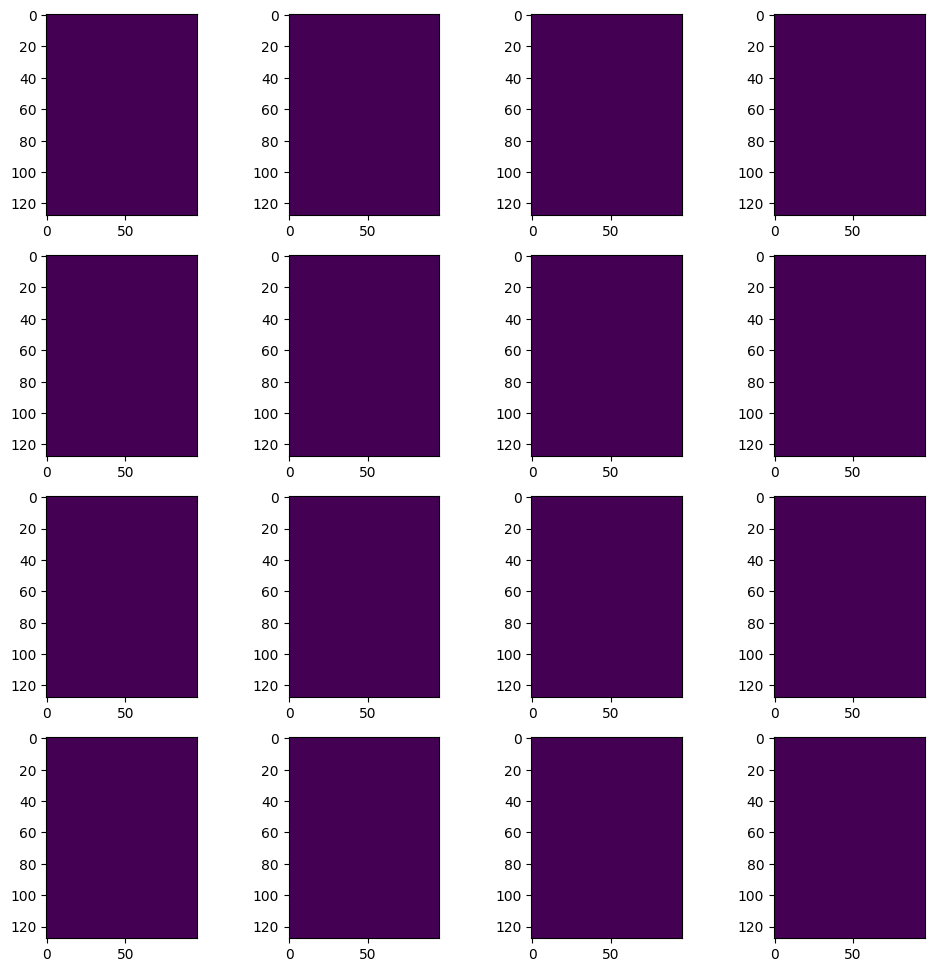

No.1 torch.Size([4, 1, 128, 96]) torch.Size([4, 1, 128, 96])


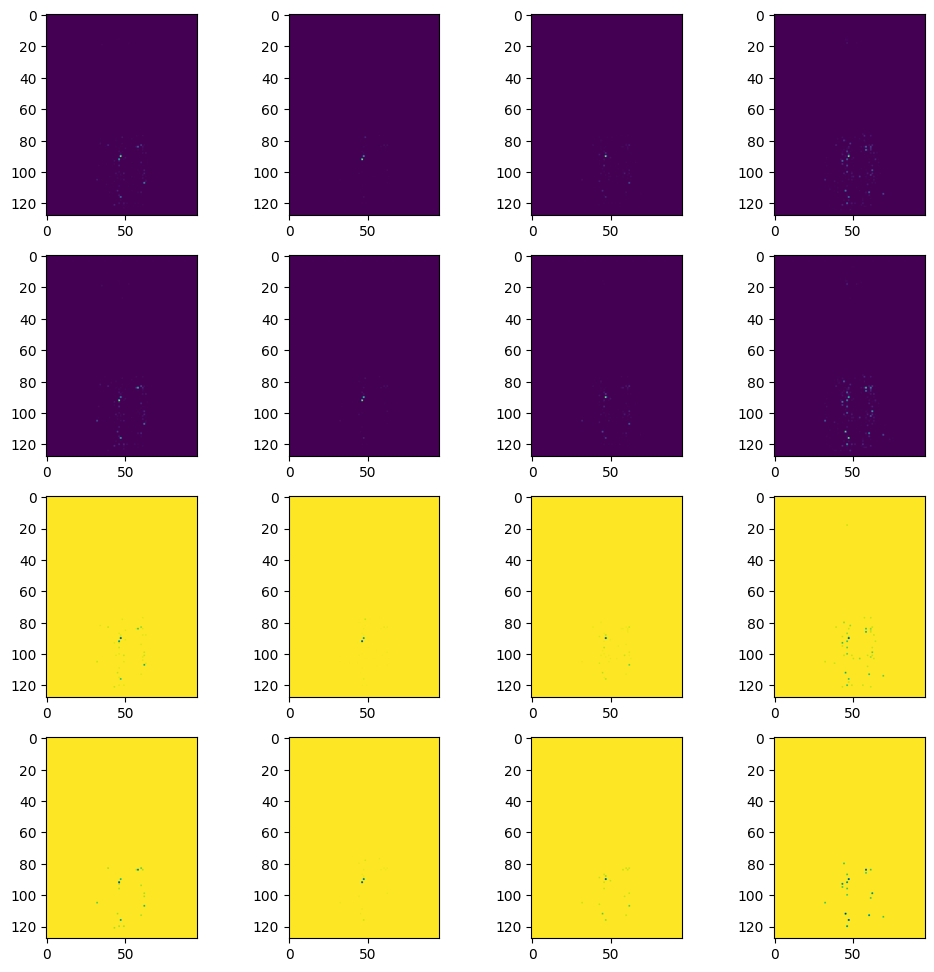

No.2 torch.Size([4, 1, 128, 96]) torch.Size([4, 1, 128, 96])


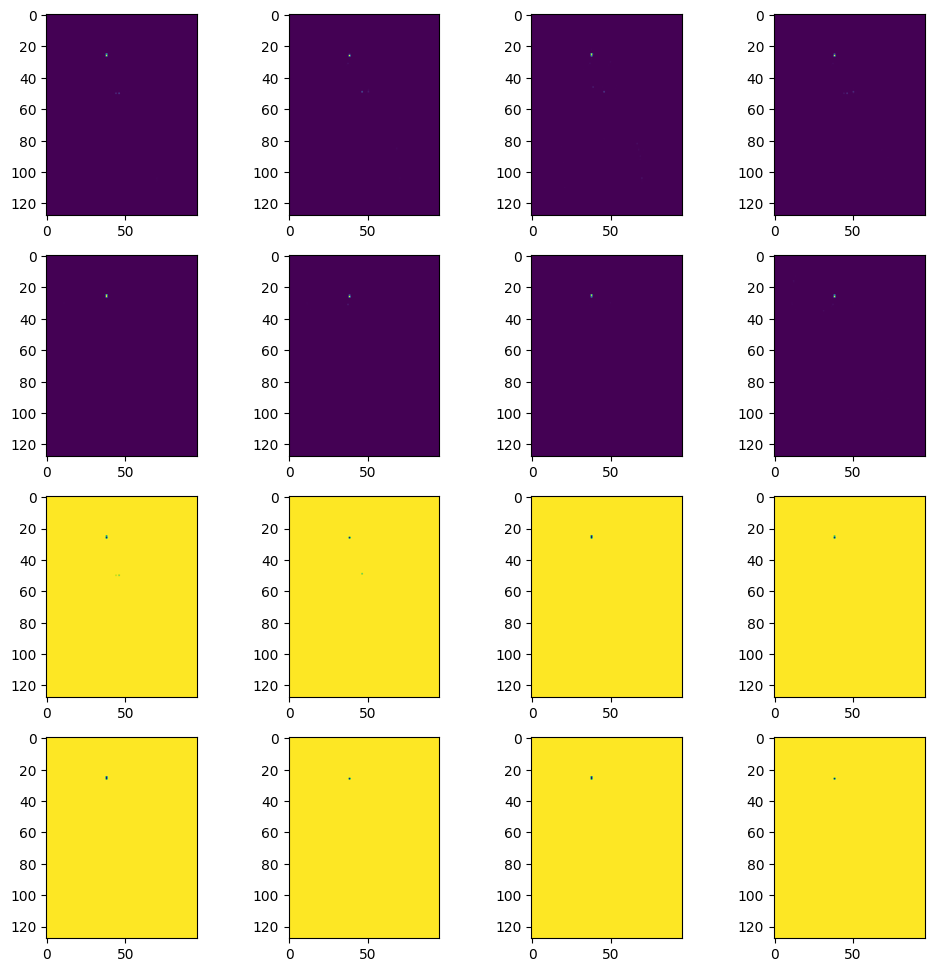

No.3 torch.Size([4, 1, 128, 96]) torch.Size([4, 1, 128, 96])


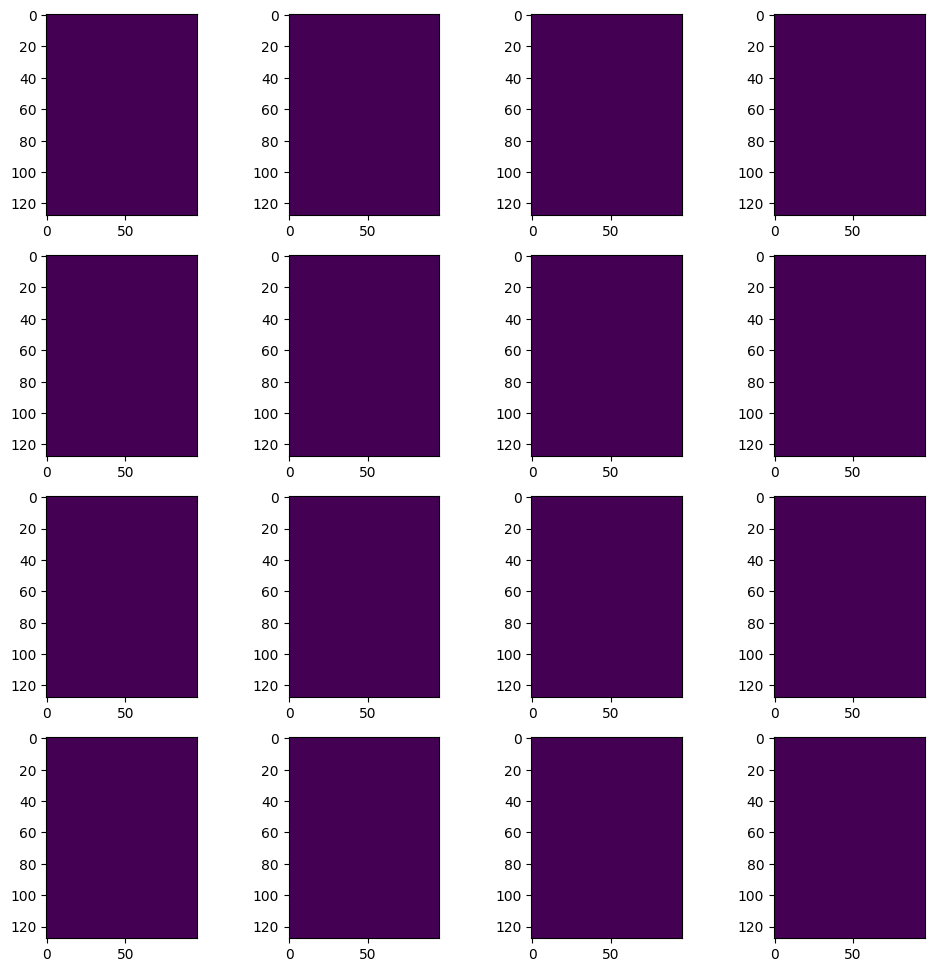

No.4 torch.Size([4, 1, 128, 96]) torch.Size([4, 1, 128, 96])


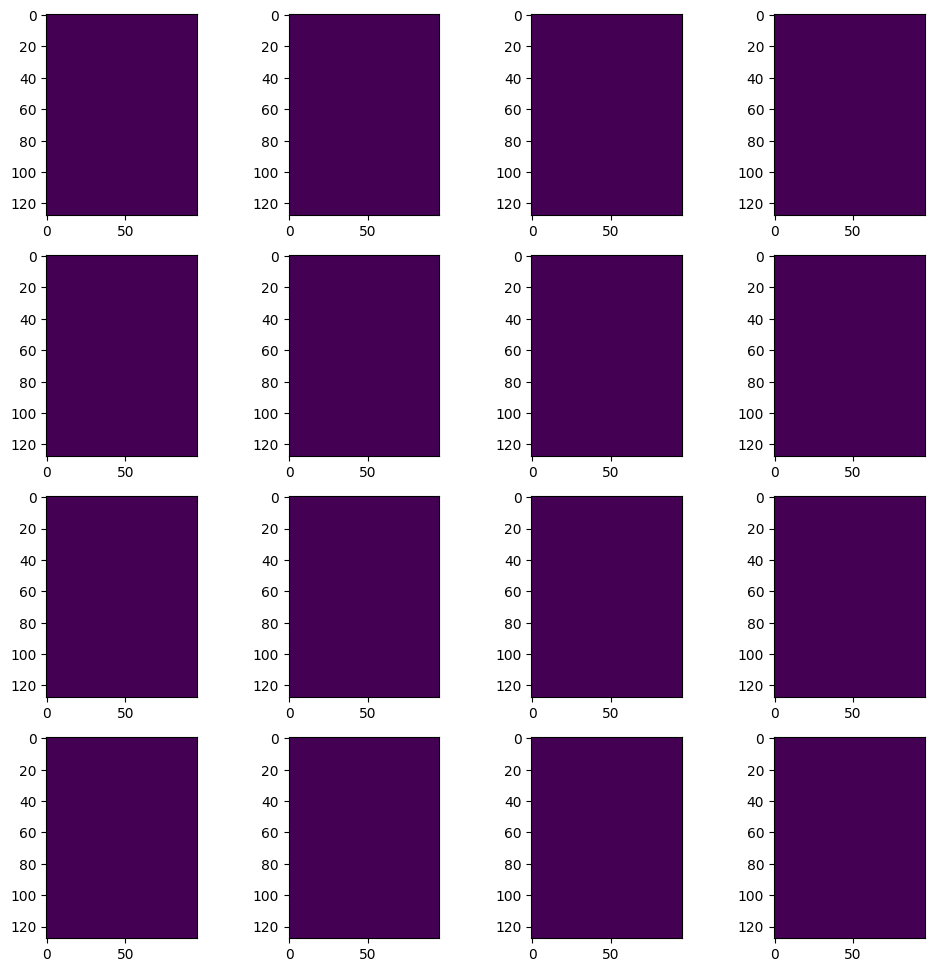

No.5 torch.Size([4, 1, 128, 96]) torch.Size([4, 1, 128, 96])


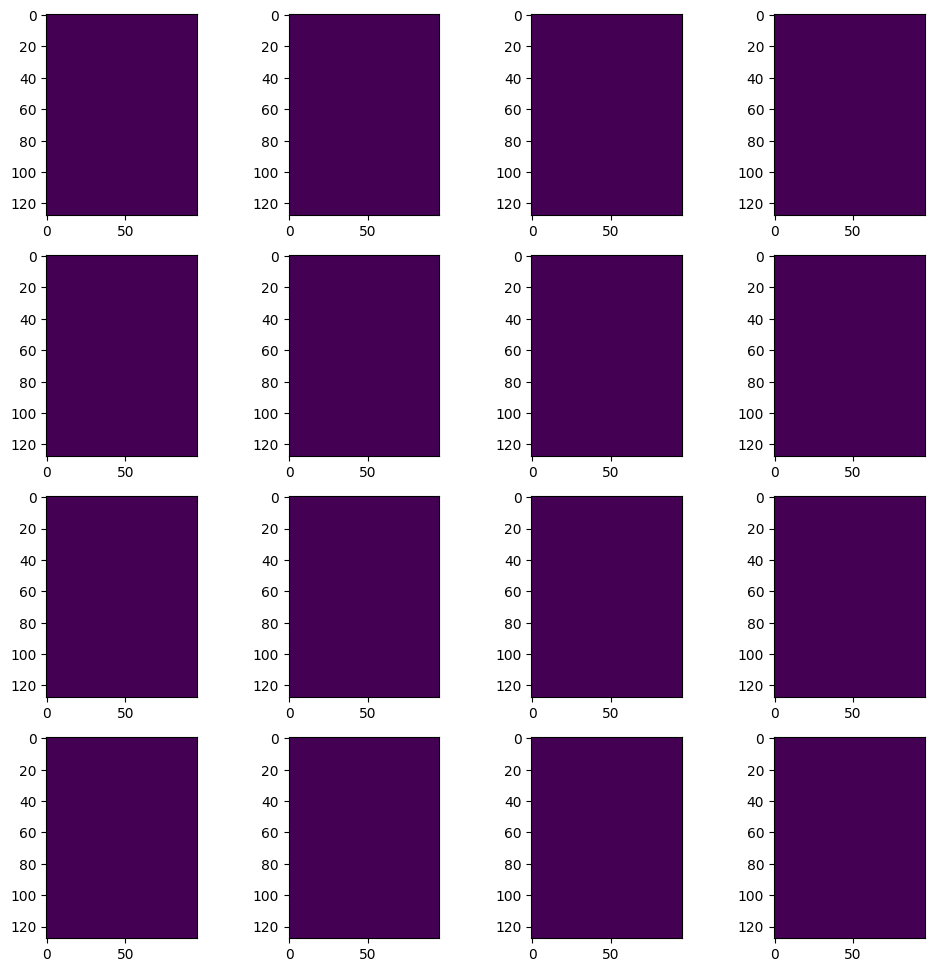

No.6 torch.Size([4, 1, 128, 96]) torch.Size([4, 1, 128, 96])


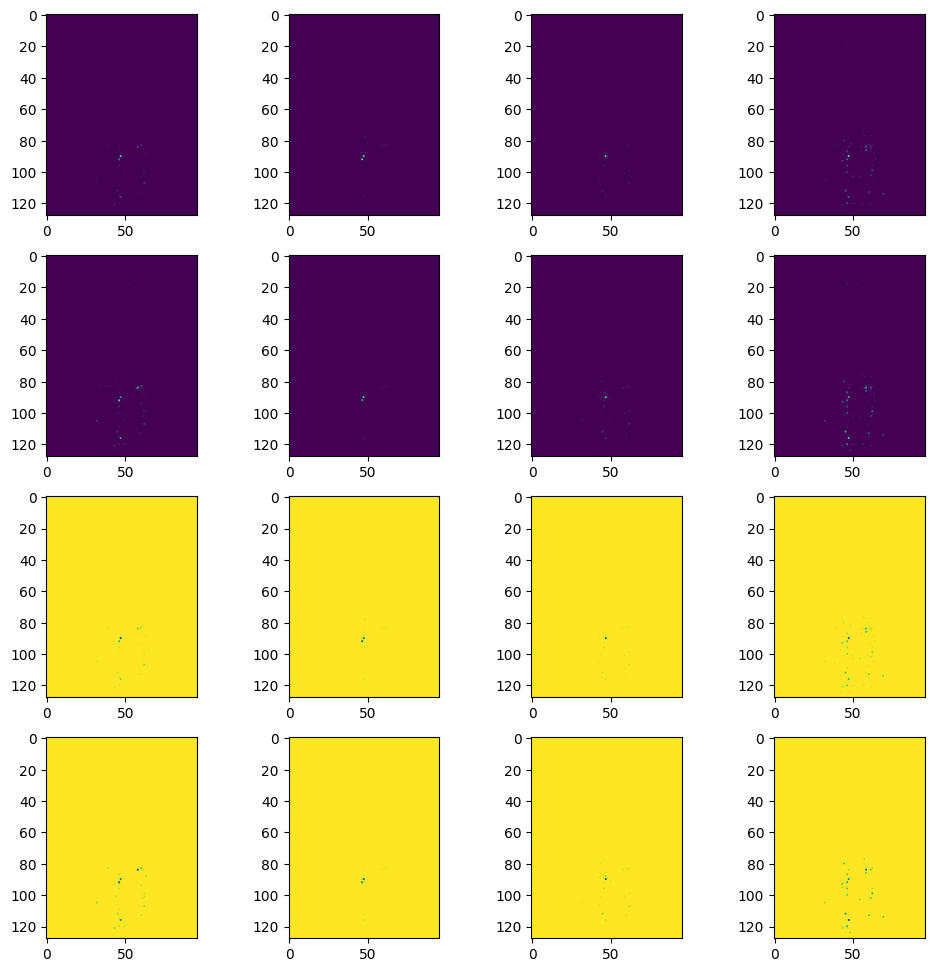

No.7 torch.Size([4, 1, 128, 96]) torch.Size([4, 1, 128, 96])


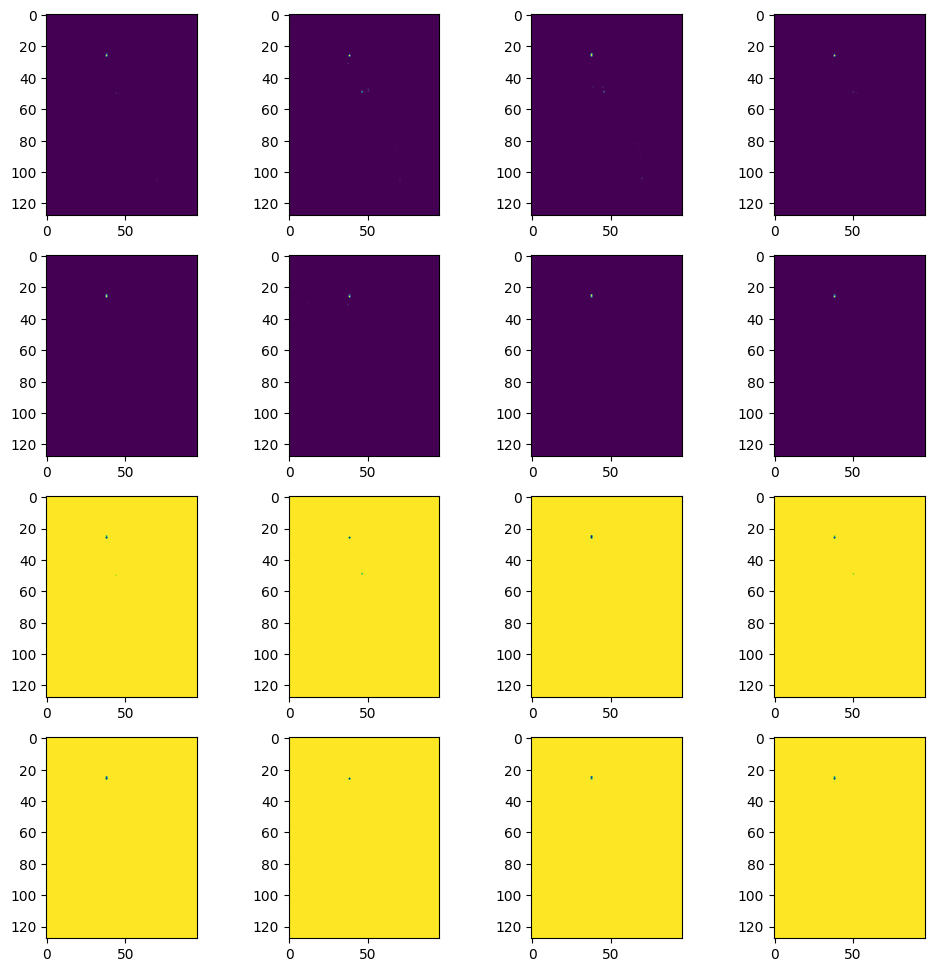

No.8 torch.Size([4, 1, 128, 96]) torch.Size([4, 1, 128, 96])


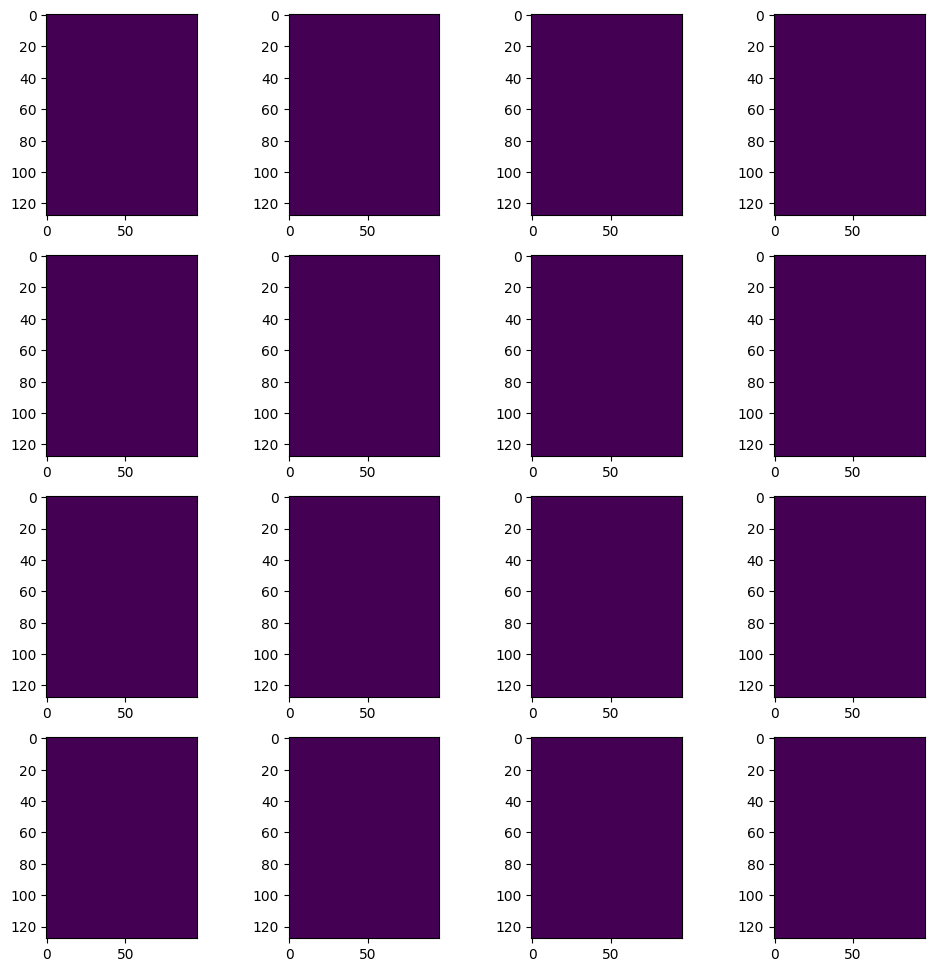

No.9 torch.Size([4, 1, 128, 96]) torch.Size([4, 1, 128, 96])


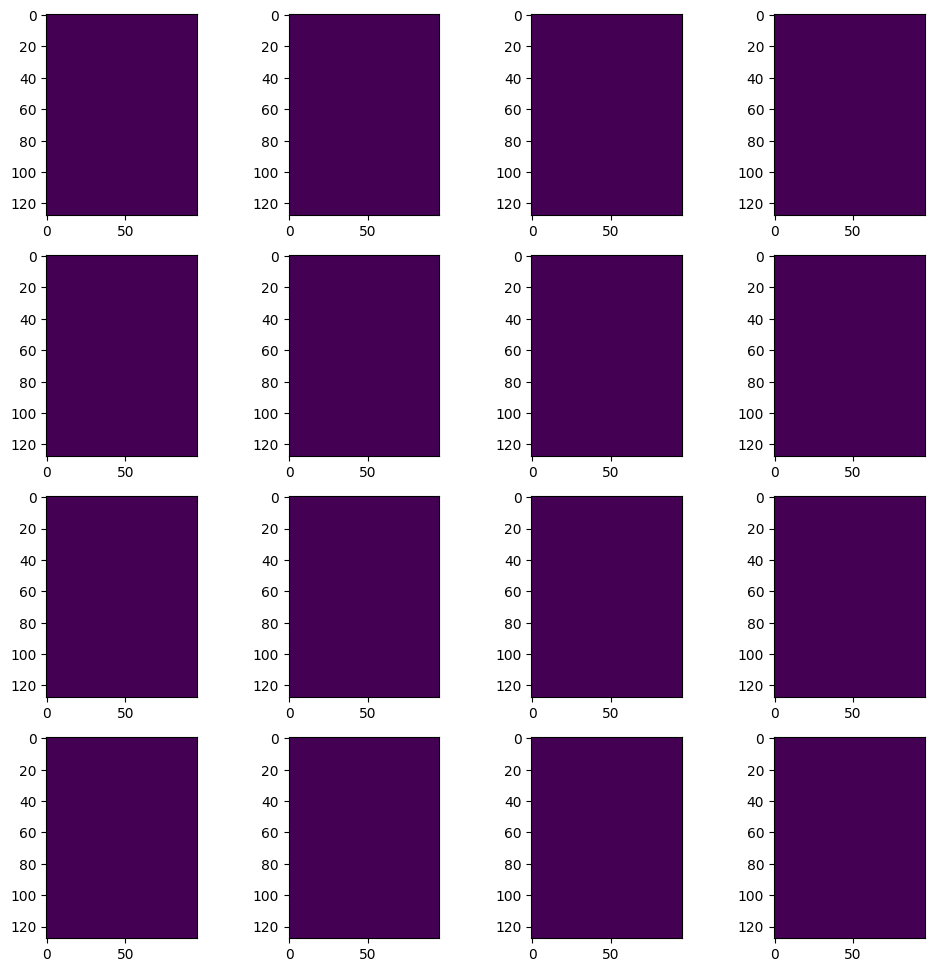

No.10 torch.Size([4, 1, 128, 96]) torch.Size([4, 1, 128, 96])


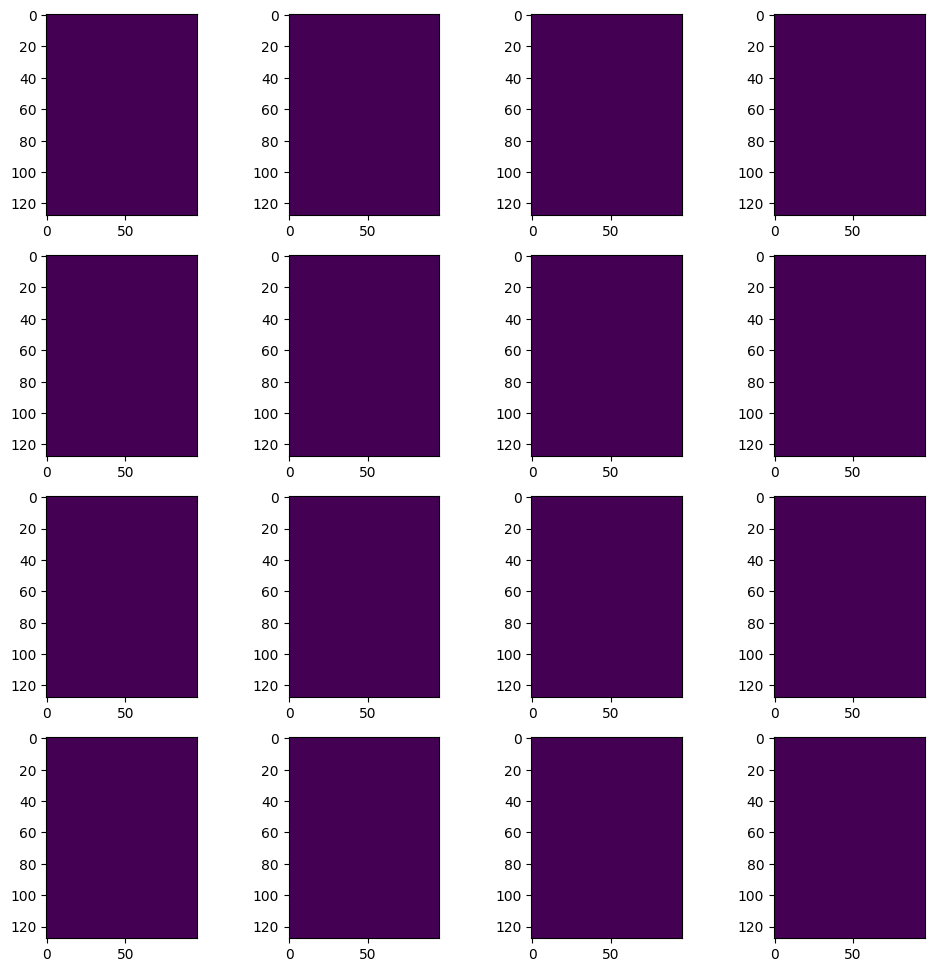

No.11 torch.Size([4, 1, 128, 96]) torch.Size([4, 1, 128, 96])


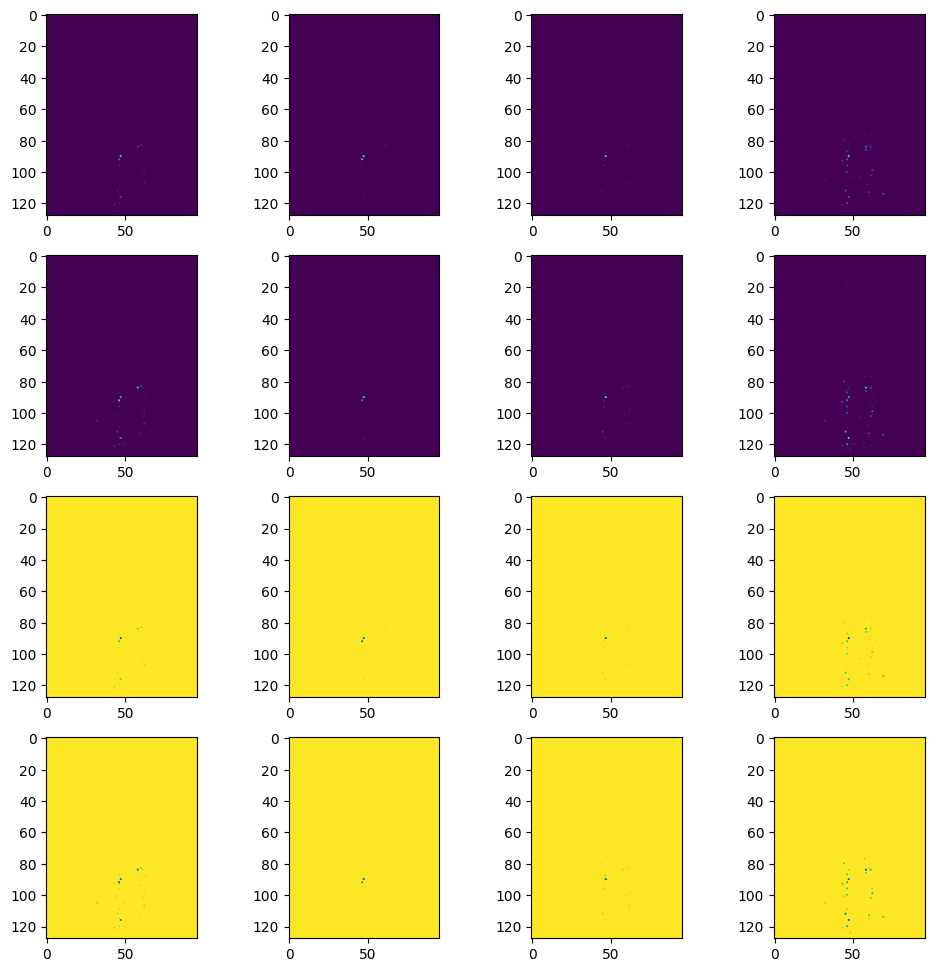

In [157]:
for i in range(low,high+1):
    cattn = load(cross_attn[i])
    cattn_re=reshape_view(cattn,h,w)  # torch.Size([8, 2, 32, 24])

    noise,vton=cattn_re.chunk(2,dim=1) # 8 1 32 24
    n1,n2=noise.chunk(2) # 4 1 32 24
    v1,v2=vton.chunk(2) # 4 1 32 24
    print(f'No.{i} {n1.shape} {v1.shape}')
    
    plt.figure(figsize=(12,12))
    for j in range(4):
        plt.subplot(4,4,j+1)
        plt.imshow(np.array(v1[j][0]))
    for j in range(4):
        plt.subplot(4,4,4+j+1)
        plt.imshow(np.array(v2[j][0]))
    for j in range(4):
        plt.subplot(4,4,4*2+j+1)
        plt.imshow(np.array(n1[j][0]))
    for j in range(4):
        plt.subplot(4,4,4*3+j+1)
        plt.imshow(np.array(n2[j][0]))
    plt.show()
    if i > low+10:
        break

In [15]:
import torch
import numpy as np
import torch.nn.functional as F
# 这里的loss计算完成后，再求一下梯度，再乘rho即可
# attnmap也是个list
# 输入时 mask 四维   attenmap里面每一个都是四维[四维，四维.....]

# mask = F.interpolate(mask, size=size, mode='bilinear', align_corners=False)
mask_latent = torch.nn.functional.interpolate(
    mask.float(), size=(32, 24),mode='bilinear', align_corners=False
)
# mask_latent.shape 4 1 32 24
mask_latent = mask_latent.squeeze(dim=1) # 4 32 24

# 模拟给出 list len=4 每个数据 4 32 24
# attnmap_moni=[torch.ones((4,32,24)) for _ in range(4)]
attnmap_moni = [a.squeeze(dim=1) for a in attnmap_real]

# 我这里直接给出mask 4*32*24 配好维度
# 注意力给出 attenmap里面每一个都是三维[三维，4*32*24.....]
def mask_crossattnloss(attnmap,mask,b):
    loss = 0
    layer_mask = mask
    ### 用mask提高前景和背景的差异
    for i in range(len(attnmap)): # 假设attnmap是四维 bz head h w
        compute_croatnn = attnmap[i]

        if b != 1:
            bg_pixels = (layer_mask == 0).sum(dim=[1, 2])  # 在第 1 和第 2 维度上求和 => （b，）
            ployp_pixels = 32*24 - bg_pixels # 求出非零像素的个数

            # 三个维度？
            # 前景像素 三维   三维 * 三维 点乘 同纬度可以相乘
            ployp_region = compute_croatnn * layer_mask
            # 背景像素 三维   三维 * 三维 点乘 同纬度可以相乘
            bg_region = compute_croatnn * (1.- layer_mask)

            # sum之后 1维   注意力的前景/真实前景 获得比例
            ploy_mean = ployp_region.sum(dim=[1,2])/ployp_pixels
            # 同理 背景 像素比例
            bg_mean = bg_region.sum(dim=[1,2])/bg_pixels
        else:
            # 全部背景像素
            bg_pixels = (layer_mask==0).sum()
            # 全部前景像素
            ployp_pixels = 32*24 - bg_pixels 

            # 注意力的前景
            ployp_region = compute_croatnn * layer_mask
            # 注意力的背景
            bg_region = compute_croatnn * (1.- layer_mask)

            # 注意力前景/真实前景
            ploy_mean = ployp_region.sum()/ployp_pixels
            # 注意力背景/真实背景
            bg_mean = bg_region.sum()/bg_pixels

        # 损失就是  1-(前景比例-背景比例)  希望损失越小，就要(前景比例-背景比例) 越大，就需要 前景比例 更大！！
        loss += 1- abs(ploy_mean - bg_mean)

    return loss.mean()

In [16]:
attnmap_moni[0].shape

torch.Size([4, 32, 24])

In [19]:
# b也可以调整
mask_crossattnloss(attnmap_moni,mask_latent,b=2)

tensor(181.5125)